# Blockchain development research

- This is a research of popularity and features of various different blockchain development
  by analysing the questions and answers on the world number one programmer forum StackOverflow
- For updates [subscribe to newsletter](https://tradingstrategy.ai/community) or
  [follow on Twitter](https://tradingstrategy.ai/community)

In [1]:
import pandas as pd

from blockchain_stackoverflow import entertain_me
from blockchain_stackoverflow.helpers import clip_to_data_available_period

# Initialise notebook output
entertain_me()  

# Load our data
df = pd.read_parquet("blockchain-questions.parquet")
df = clip_to_data_available_period(df)

## StackOverflow - overall popularity

- We know the popularity of StackOverflow is in decline
- We need to calibrate any declining popularity in blockchain tech 
  to the overall declining popularity of StackOverflow

Text(0, 0.5, 'All StackOverflow posts per quarter')

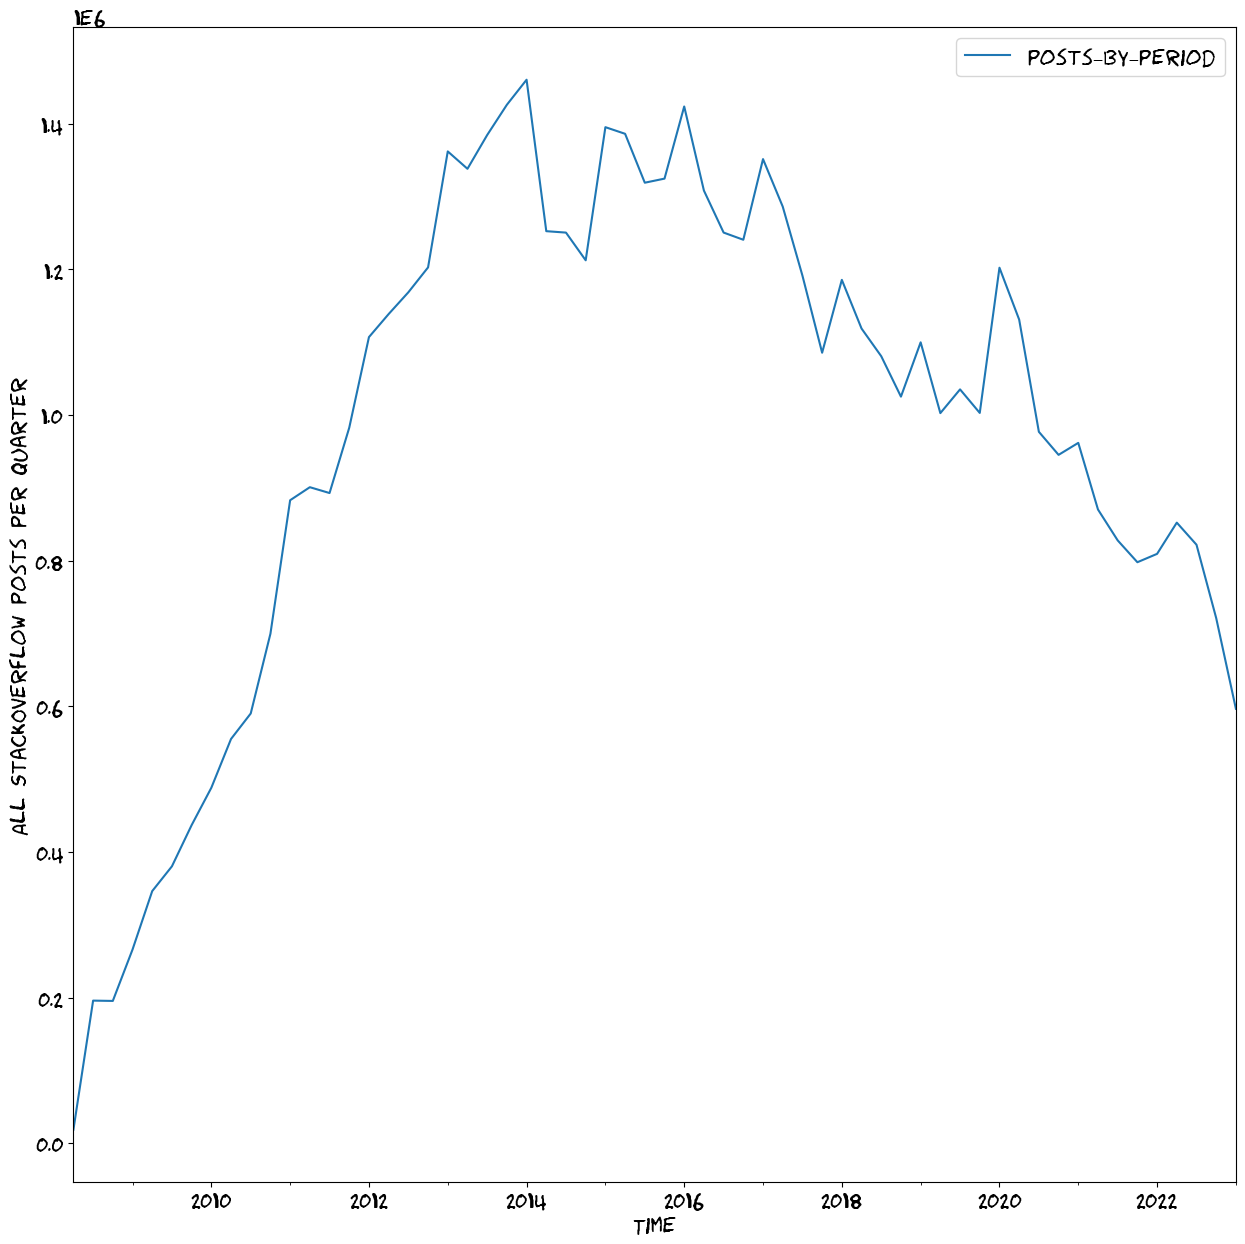

In [2]:
all_posts_quarterly = pd.read_parquet("post_counts_quarterly.parquet")
all_posts_quarterly = all_posts_quarterly[:pd.Timestamp("2023-05-31")]

ax = all_posts_quarterly.plot.line()
ax.set_xlabel("Time")
ax.set_ylabel("All StackOverflow posts per quarter")

## Blockchain questions data

- We have collected ~30k StackOverflow blockchain development related posts over a decade
- First posts were Bitcoin related
- After Ethereum mainnet become useable 2017, Ethereum has dominated blockchain development

Text(0, 0.5, 'All blockchains posts per month')

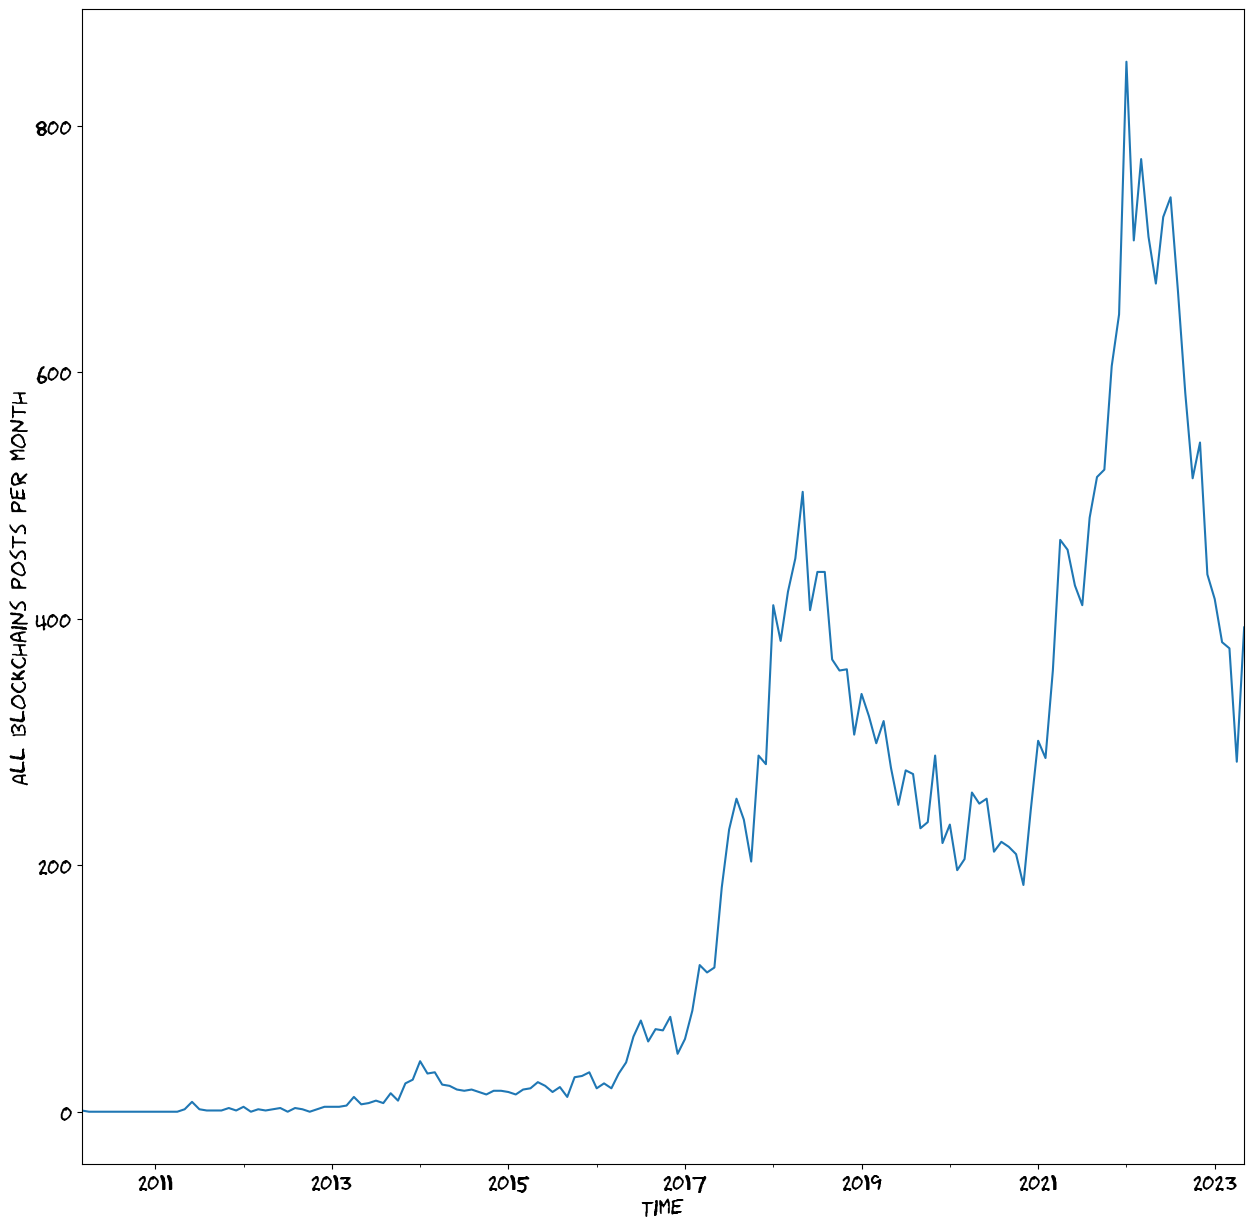

In [3]:

from blockchain_stackoverflow.helpers import bin_to_time

all_blockchain_posts = bin_to_time(df, frequency="MS")

ax = all_blockchain_posts.plot.line()
ax.set_xlabel("Time")
ax.set_ylabel("All blockchains posts per month")


## Blockchains - top developer interest

Plot the popularity of top three blockchains, as inferred from the domain specific knowledge.

- Ethereum, Bitcoin, Solana and Near Protocol have so much developer interest that it does not make sense
  to plot them on the same scale with the other chains

**Note**: This chart is absolute post numbers and not adjusted to the overall decline of StackOverflow.

Text(0, 0.5, 'Top blockchain StackOverflow posts per quarter')

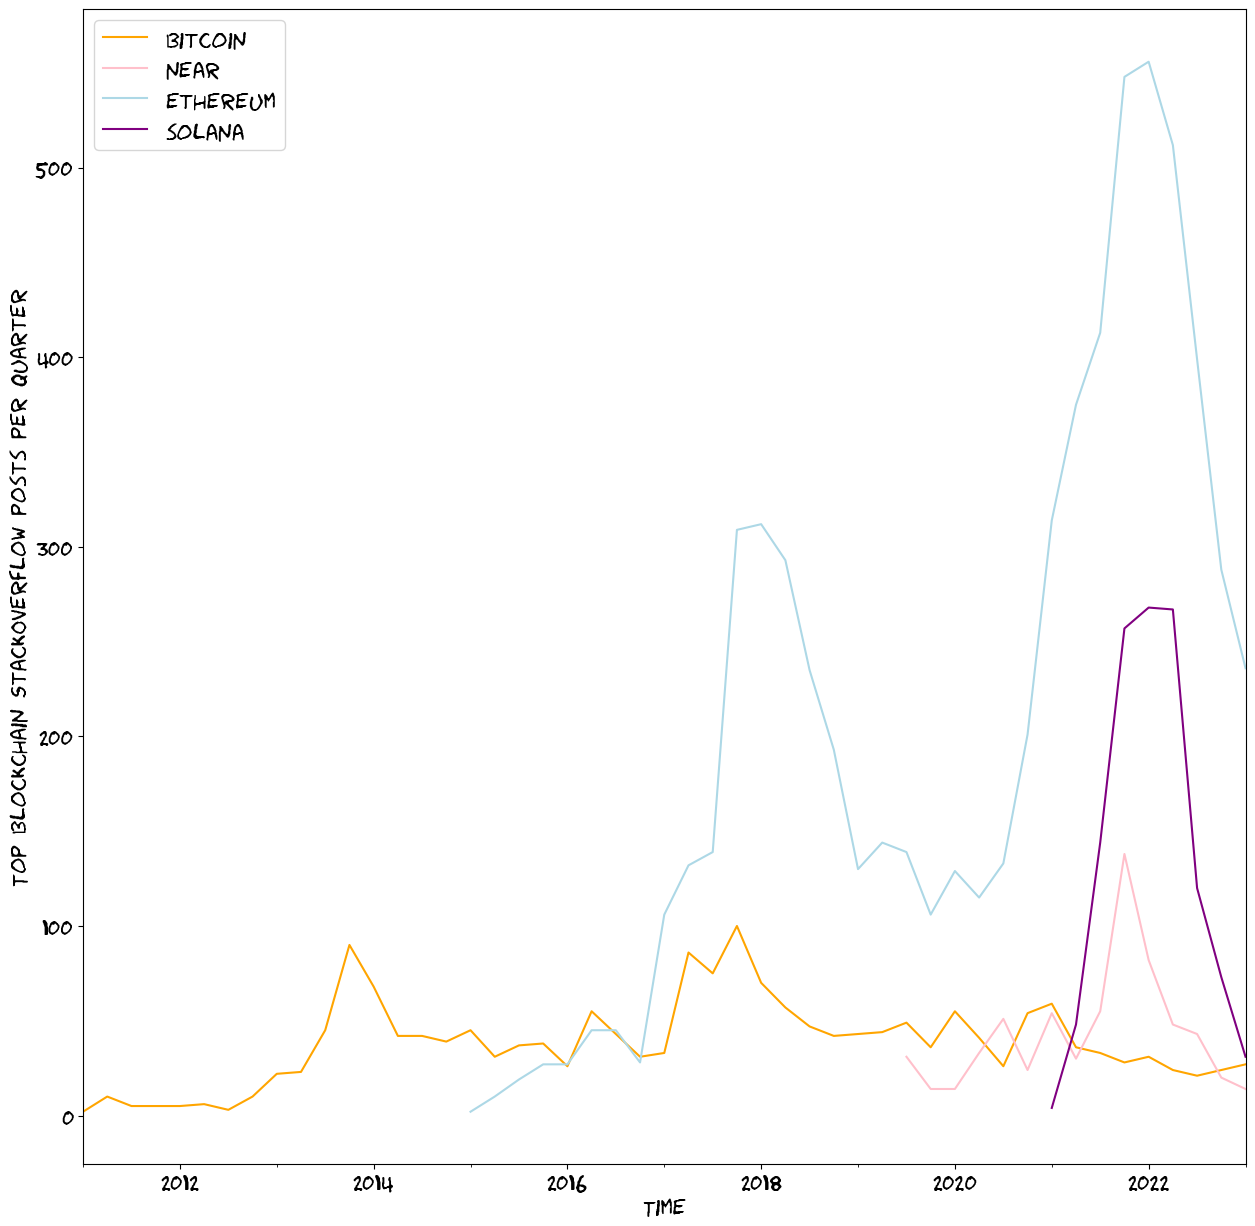

In [4]:
from blockchain_stackoverflow.helpers import create_binned_df_by_tags

quaterly_binned = create_binned_df_by_tags(df, {
    "bitcoin": ("bitcoin", "bitcoind", "bitcoinj"),
    "near": ("nearprotocol", "near"),
    "ethereum": ("ethereum",),
    "solana": ("solana", "solana-cli"),
})

ax = quaterly_binned.plot.line(
    color={
        "bitcoin": "orange",
        "ethereum": "lightblue",
        "solana": "purple",
        "near": "pink",
    }
)

ax.set_xlabel("Time")
ax.set_ylabel("Top blockchain StackOverflow posts per quarter")

## Adjusted top developer interest 

- Here we present blockchain posts as % overall posts of StackOverflow
- This accounts for any general trends of StackOverflow usage
- We find out that while when adjusted for the global decline of StackOverflow usage,
  there is a change in the downwards trends to more positive, but this change is not significant



In [5]:
# How many % of all SO.com question we are
adjusted_quaterly_binned = quaterly_binned.div(all_posts_quarterly["posts_by_period"], axis="index") * 100
adjusted_quaterly_binned = adjusted_quaterly_binned.loc[pd.Timestamp("2012-01-01"):]

Text(0, 0.5, 'Top blockchain posts - StackOverflow popularity adjusted')

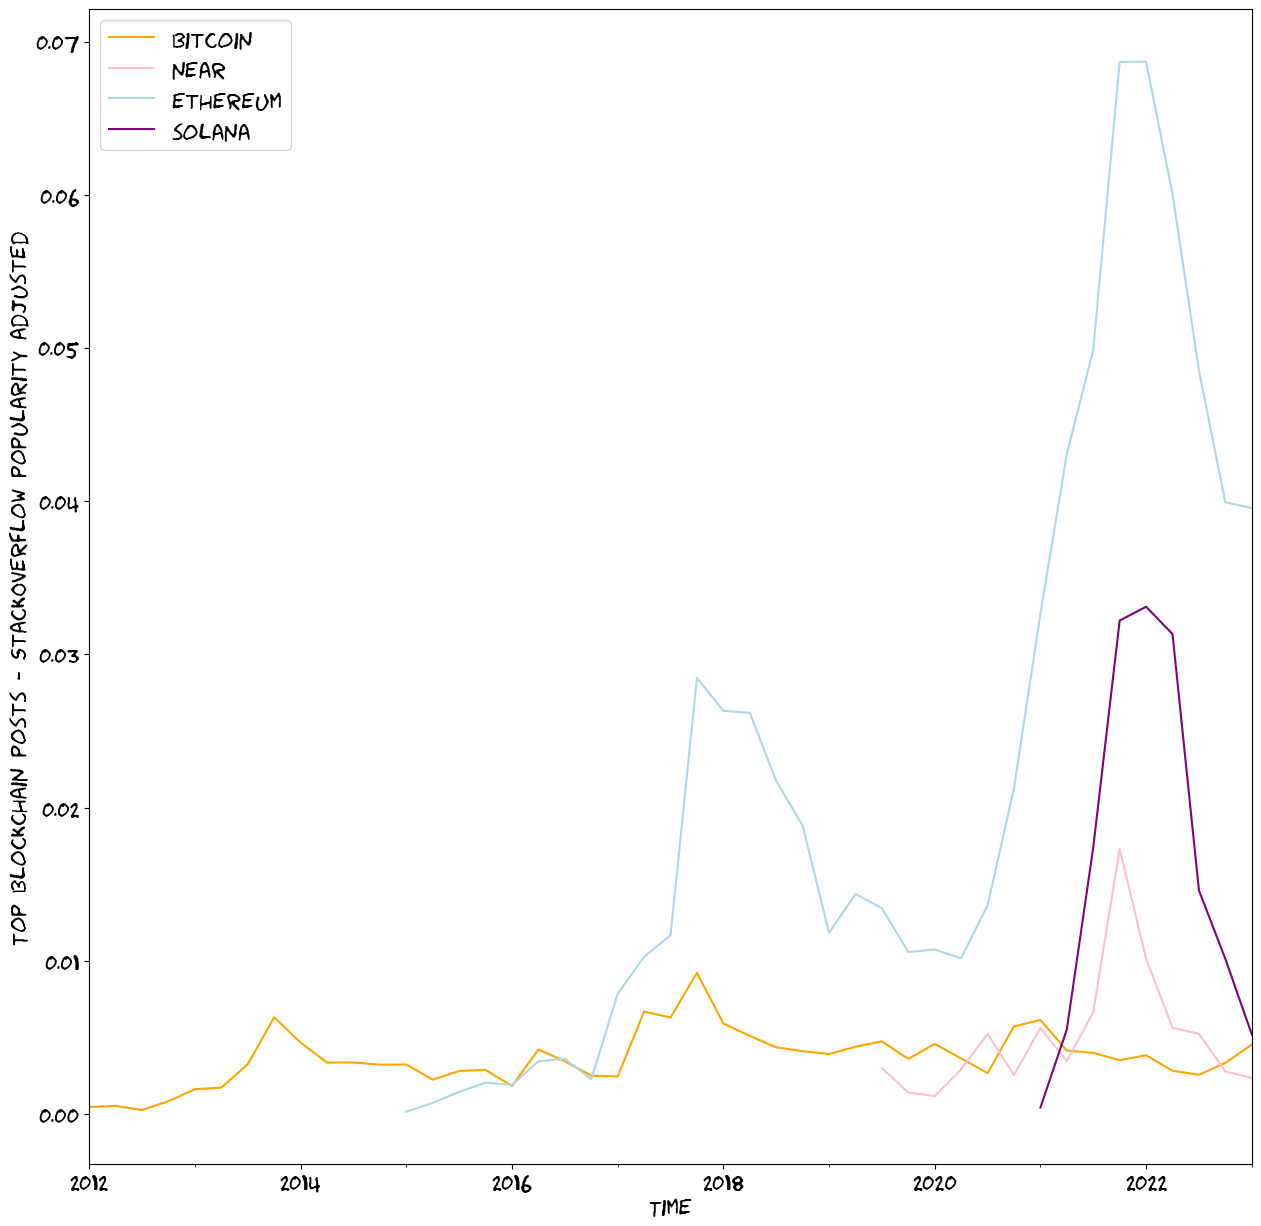

In [6]:

ax = adjusted_quaterly_binned.plot.line(
    color={
        "bitcoin": "orange",
        "ethereum": "lightblue",
        "solana": "purple",
        "near": "pink",
    }
)

ax.set_xlabel("Time")
ax.set_ylabel("Top blockchain posts - StackOverflow popularity adjusted")

# Kindlings

- New blockchains that are gaining traction, have not yet gained traction or never gained traction
- These are plot on their own chart, as the axis would be too much skewed by the top blockchains
- As of 2023, only Hedera seems to clearly gaining traction
- Tron, despite the reputation of its infamous founder, is really being seeing developer interest

Text(0, 0.5, 'StackOverflow posts per quarter')

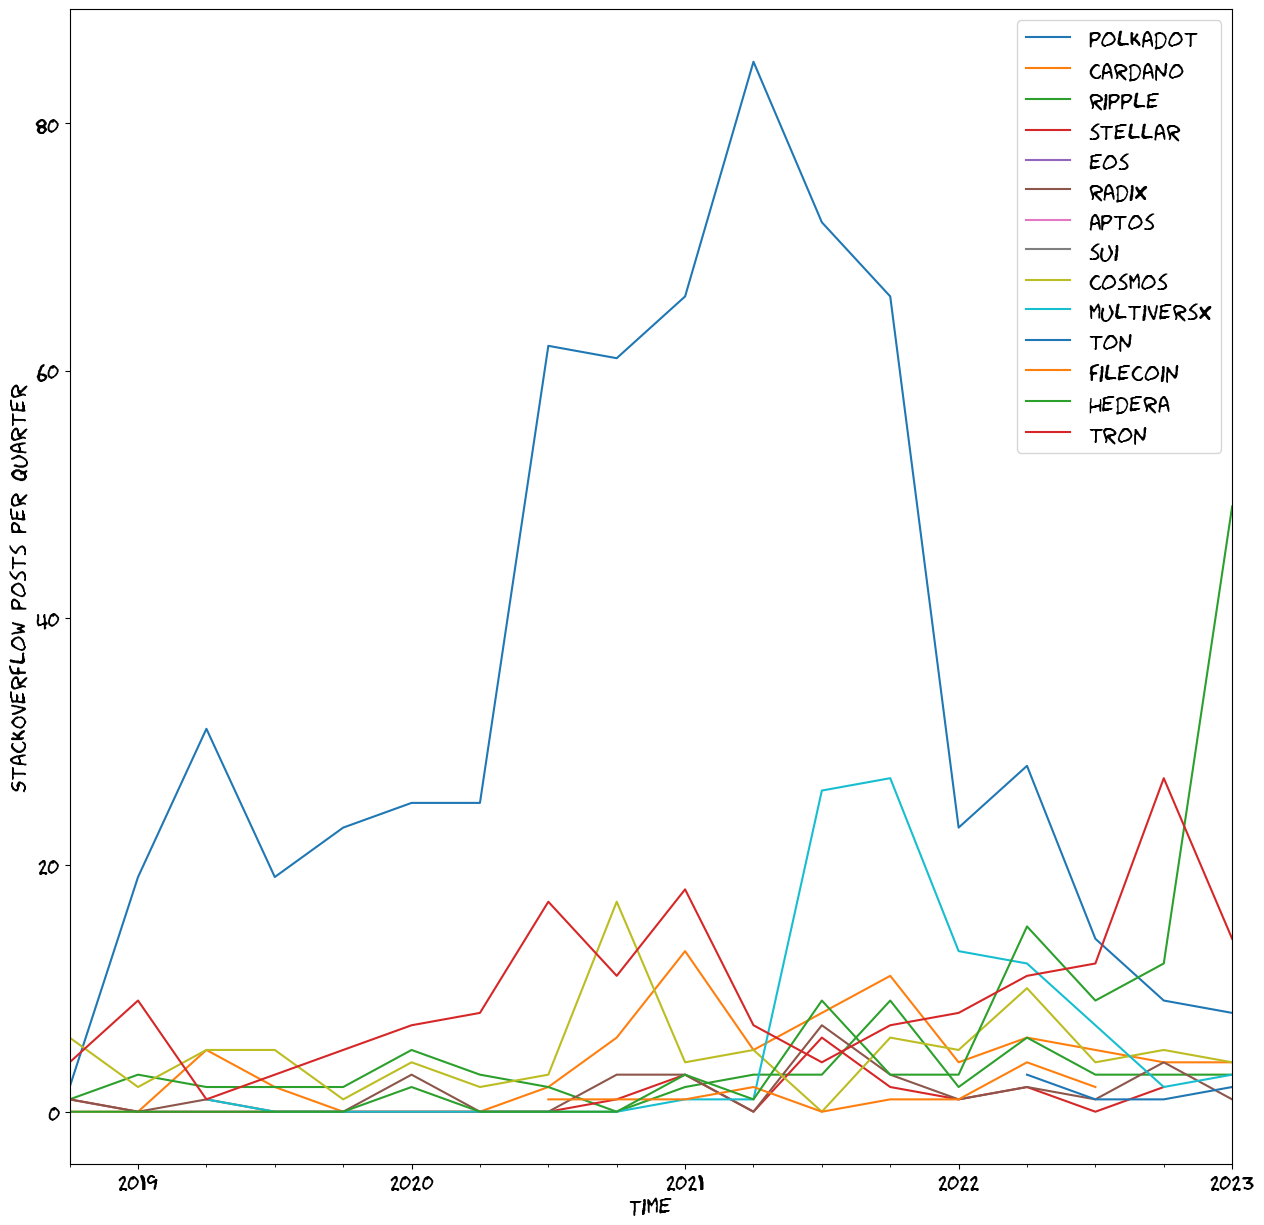

In [7]:

quaterly_binned = create_binned_df_by_tags(df, {
    "polkadot": ("polkadot", "substrate", "polkadot-js"),
    "cardano": ("cardano",),
    "ripple": ("xrp", "rippled"),
    "stellar": ("stellar"),
    "eos": ("eos"),
    "radix": ("scrypto"),
    "aptos": ("aptos"),
    "sui": ("sui"),
    "cosmos": ("cosmos-sdk", "cosmwasm", "tendermint"),
    "multiversx": ("elrond",),
    "ton": ("ton",),
    "filecoin": ("filecoin",),
    "hedera": ("hedera", "hedera-hashgraph",),
    "tron": ("tron",),
})

ax = quaterly_binned.plot.line()

ax.set_xlabel("Time")
ax.set_ylabel("StackOverflow posts per quarter")

# Generic blockchain tags

- What are the trends on generic blockchain development tags that cannot be associated with any chain

Text(0, 0.5, 'StackOverflow posts per quarter')

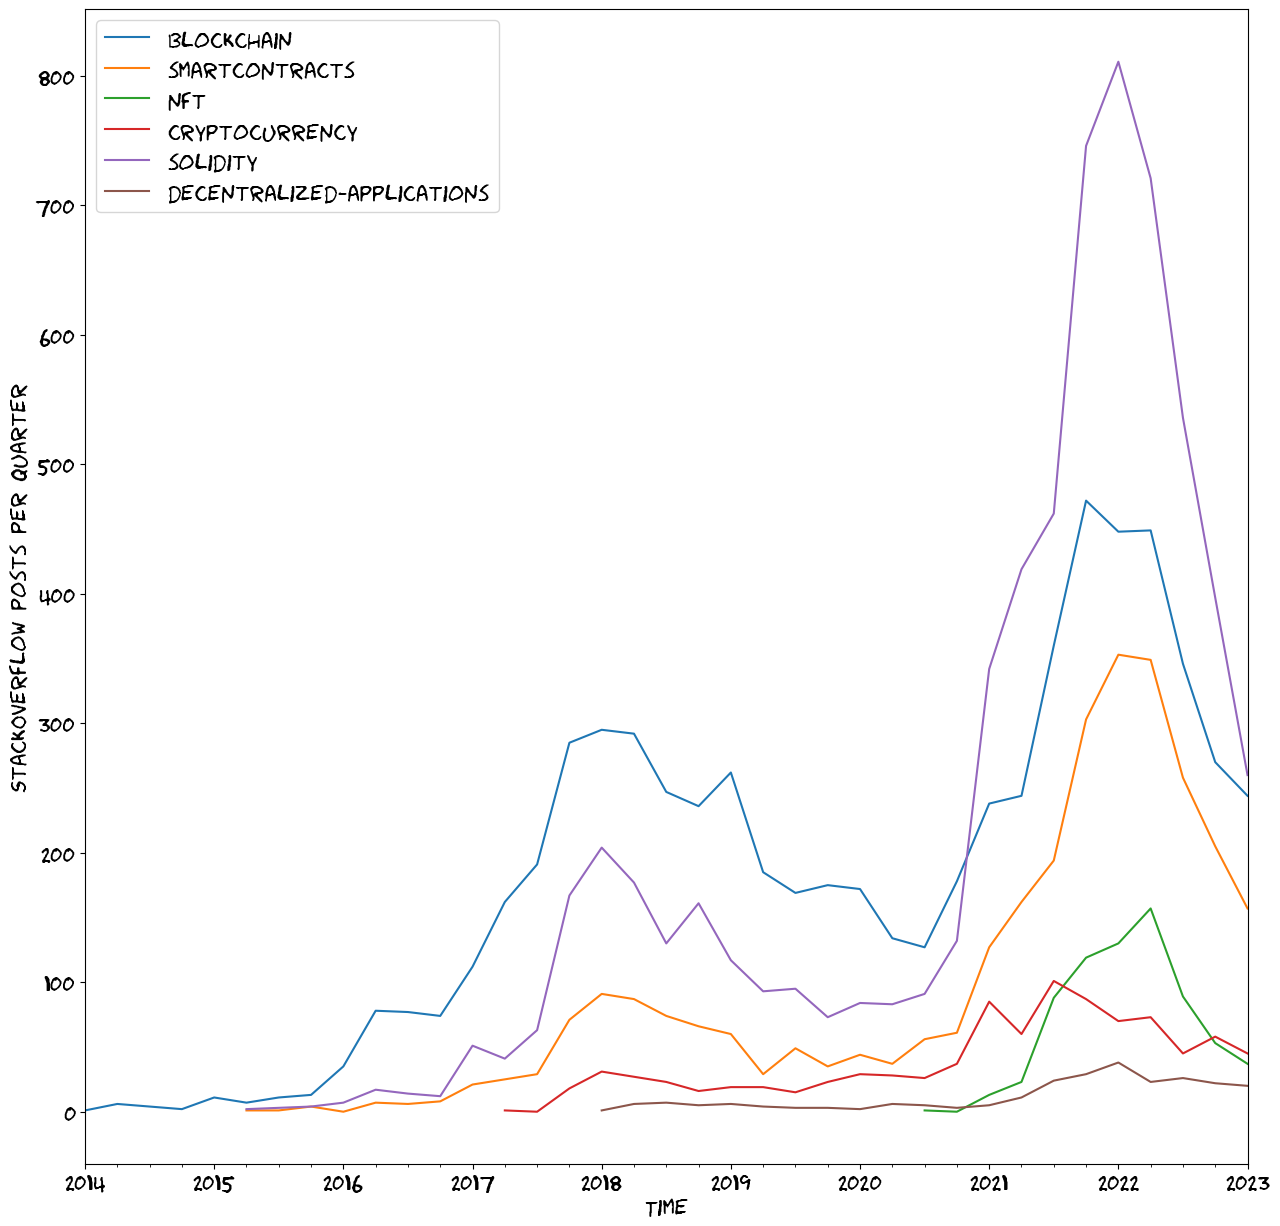

In [8]:
quaterly_binned = create_binned_df_by_tags(
    df, 
    {
        "blockchain": ("blockchain",),
        "smartcontracts": ("smartcontracts",),
        "nft": ("nft",),
        "cryptocurrency": ("cryptocurrency",),
        "solidity": ("solidity",),
        "decentralized-applications": ("decentralized-applications",),
        "web3": ("web3",),
    }, 
)

ax = quaterly_binned.plot.line()

ax.set_xlabel("Time")
ax.set_ylabel("StackOverflow posts per quarter")

# Deadchains

- Compare blockchains that are likely no longer relevant today


Text(0, 0.5, 'StackOverflow posts per year')

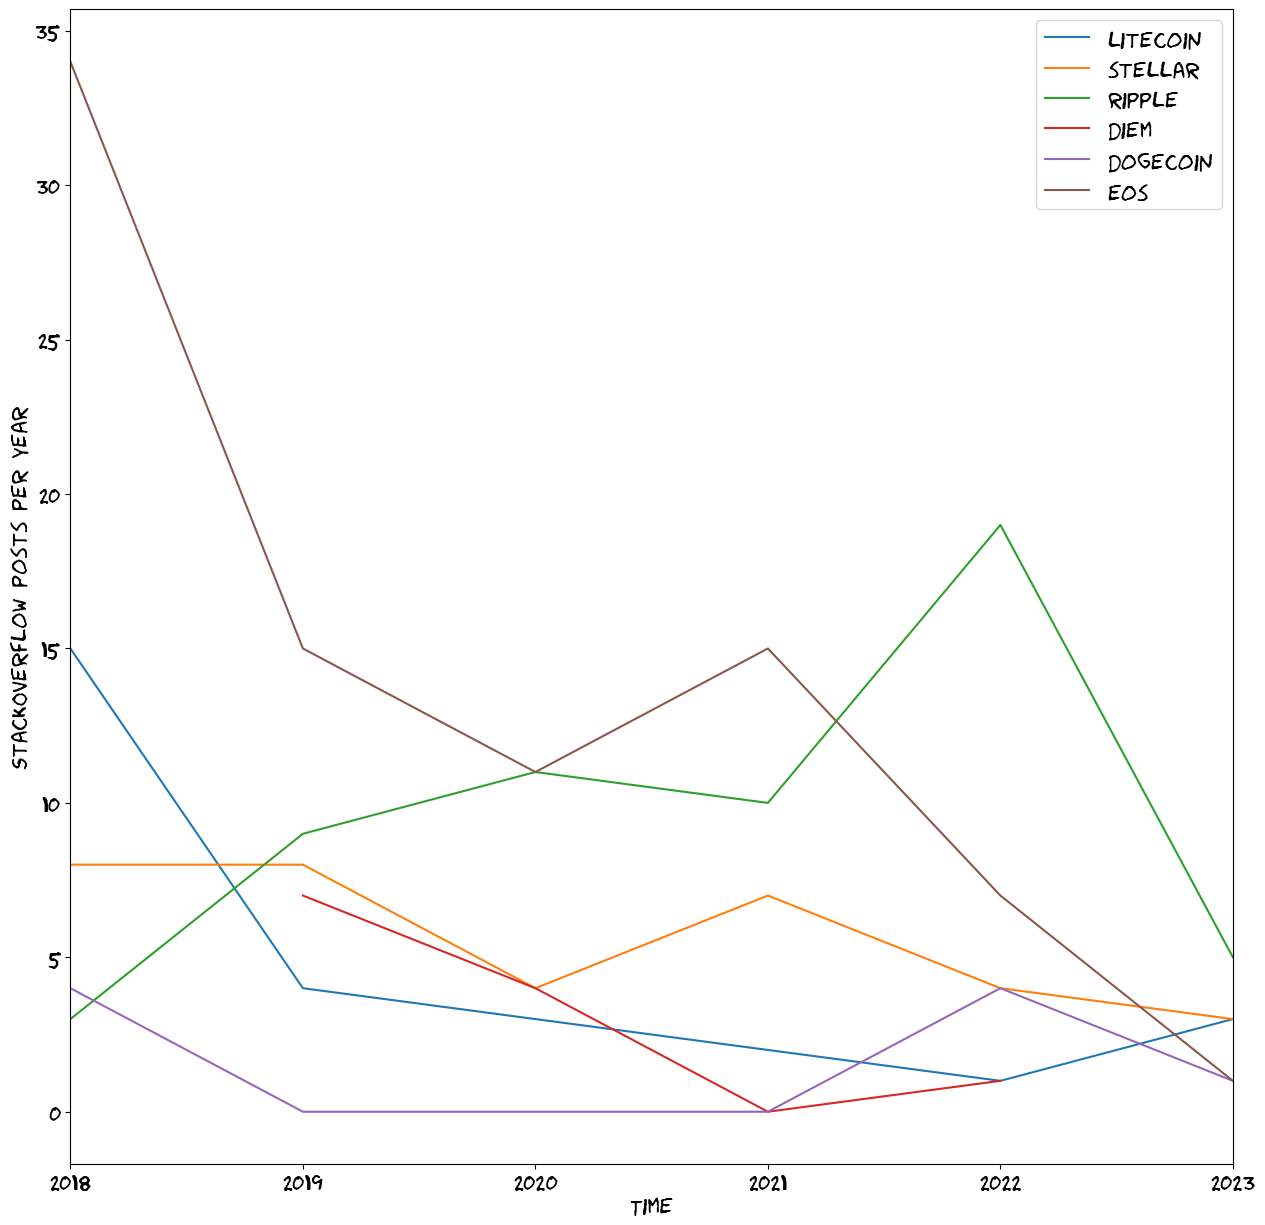

In [9]:

yearly_binned = create_binned_df_by_tags(
    df, 
    {
        "litecoin": ("litecoin",),
        "stellar": ("stellar",),
        "ripple": ("xrp", "rippled"),
        "diem": ("diem",),
        "dogecoin": ("dogecoin-api",),
        "eos": ("eos",),
    }, 
    frequency=pd.offsets.YearBegin(),
)

ax = yearly_binned.plot.line()

ax.set_xlabel("Time")
ax.set_ylabel("StackOverflow posts per year")

# Centralised exchanges developer interest

- We compare centralised exchange developer questions
- These are related to CEX APIs and automated trading
- This gives perspective whether or not infrastructure technology is winning
- We bin yearly because low activitity

Text(0, 0.5, 'StackOverflow posts per year')

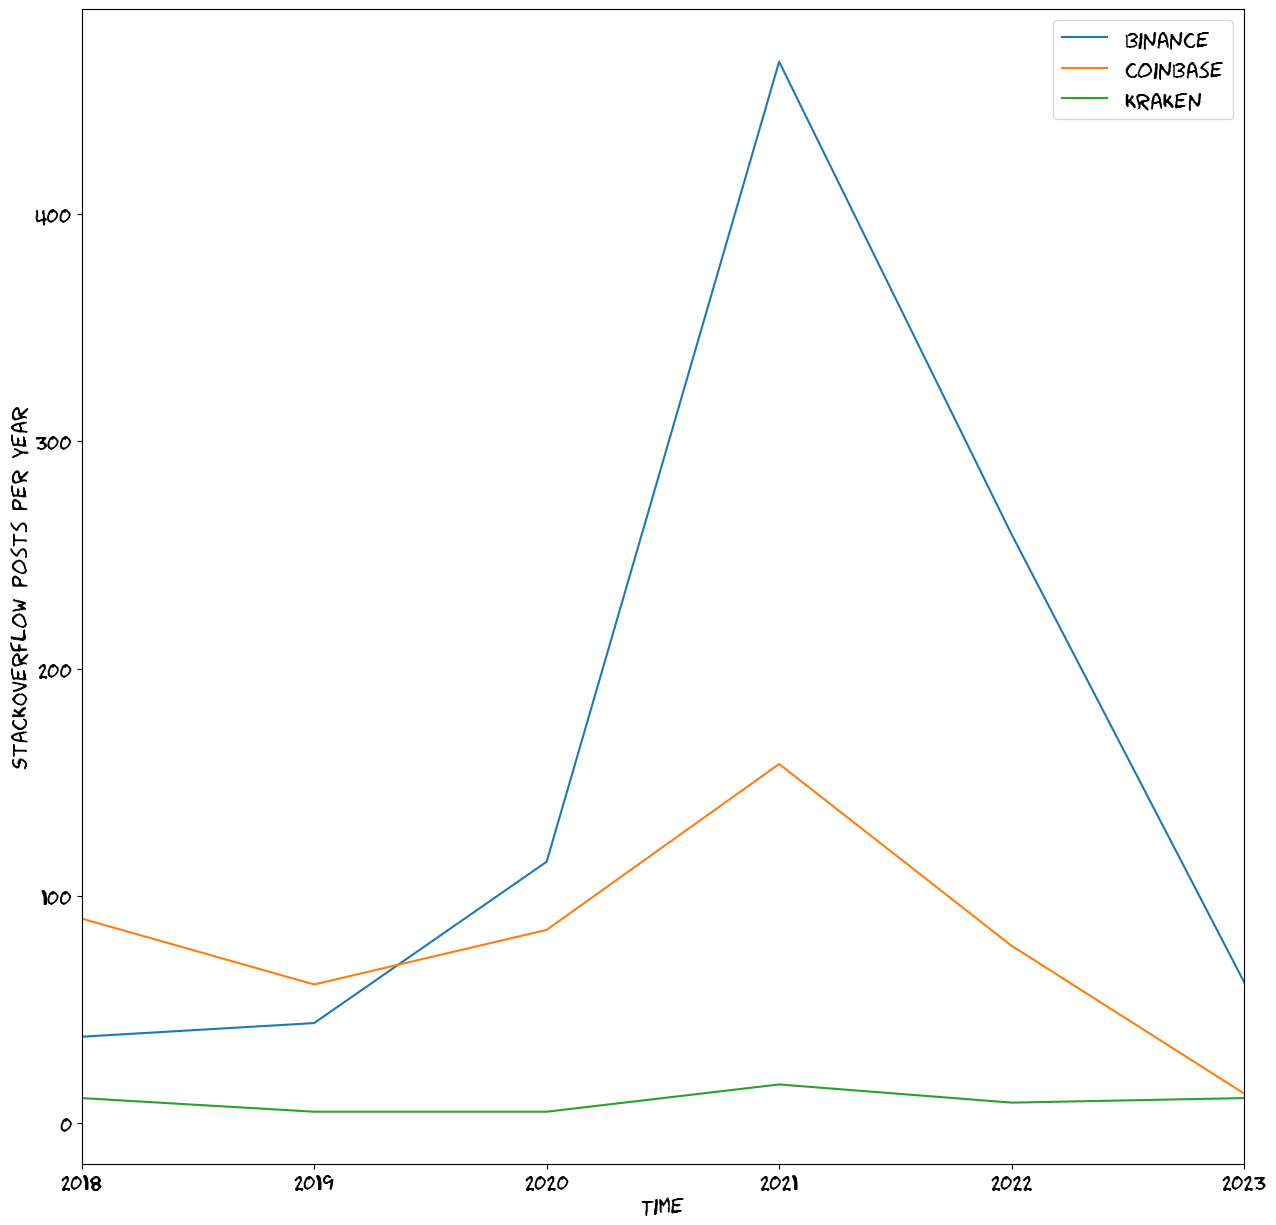

In [10]:

yearly_binned = create_binned_df_by_tags(
    df, 
    {
        "binance": ("binance",),
        "coinbase": ("coinbase-api",),
        "kraken": ("kraken.com",),
    }, 
    frequency=pd.offsets.YearBegin(),
)

ax = yearly_binned.plot.line()

ax.set_xlabel("Time")
ax.set_ylabel("StackOverflow posts per year")



# Binance Smart Chain vs. Ethereum

- Binance Smart Chain is a popular EVM-compatible clone chain due to push from Binance (50% CEX market share) 
- We do few comparisons with Binance branded tags against their native Ethereum counterparts

Text(0, 0.5, 'StackOverflow posts per quarter')

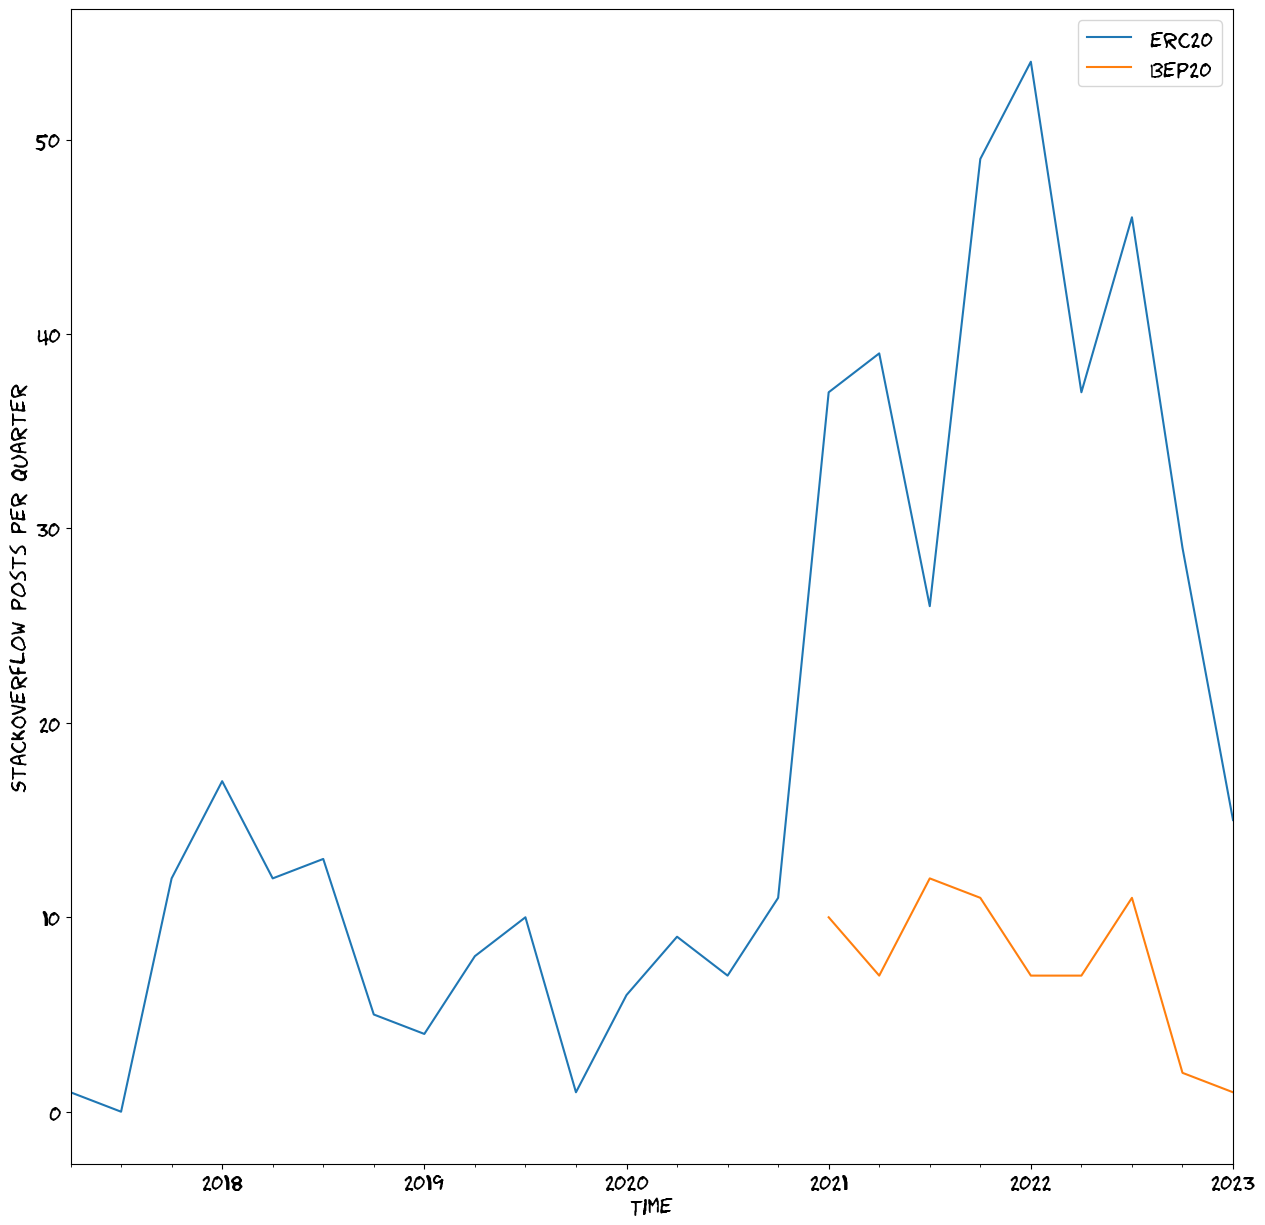

In [11]:

quaterly_binned = create_binned_df_by_tags(
    df, 
    {
        "erc20": ("erc20",),
        "bep20": ("bep20",),
    }, 
)

ax = quaterly_binned.plot.line()

ax.set_xlabel("Time")
ax.set_ylabel("StackOverflow posts per quarter")

# Uniswap vs. PancakeSwap

- Which one do developers care about

Text(0, 0.5, 'StackOverflow posts per quarter')

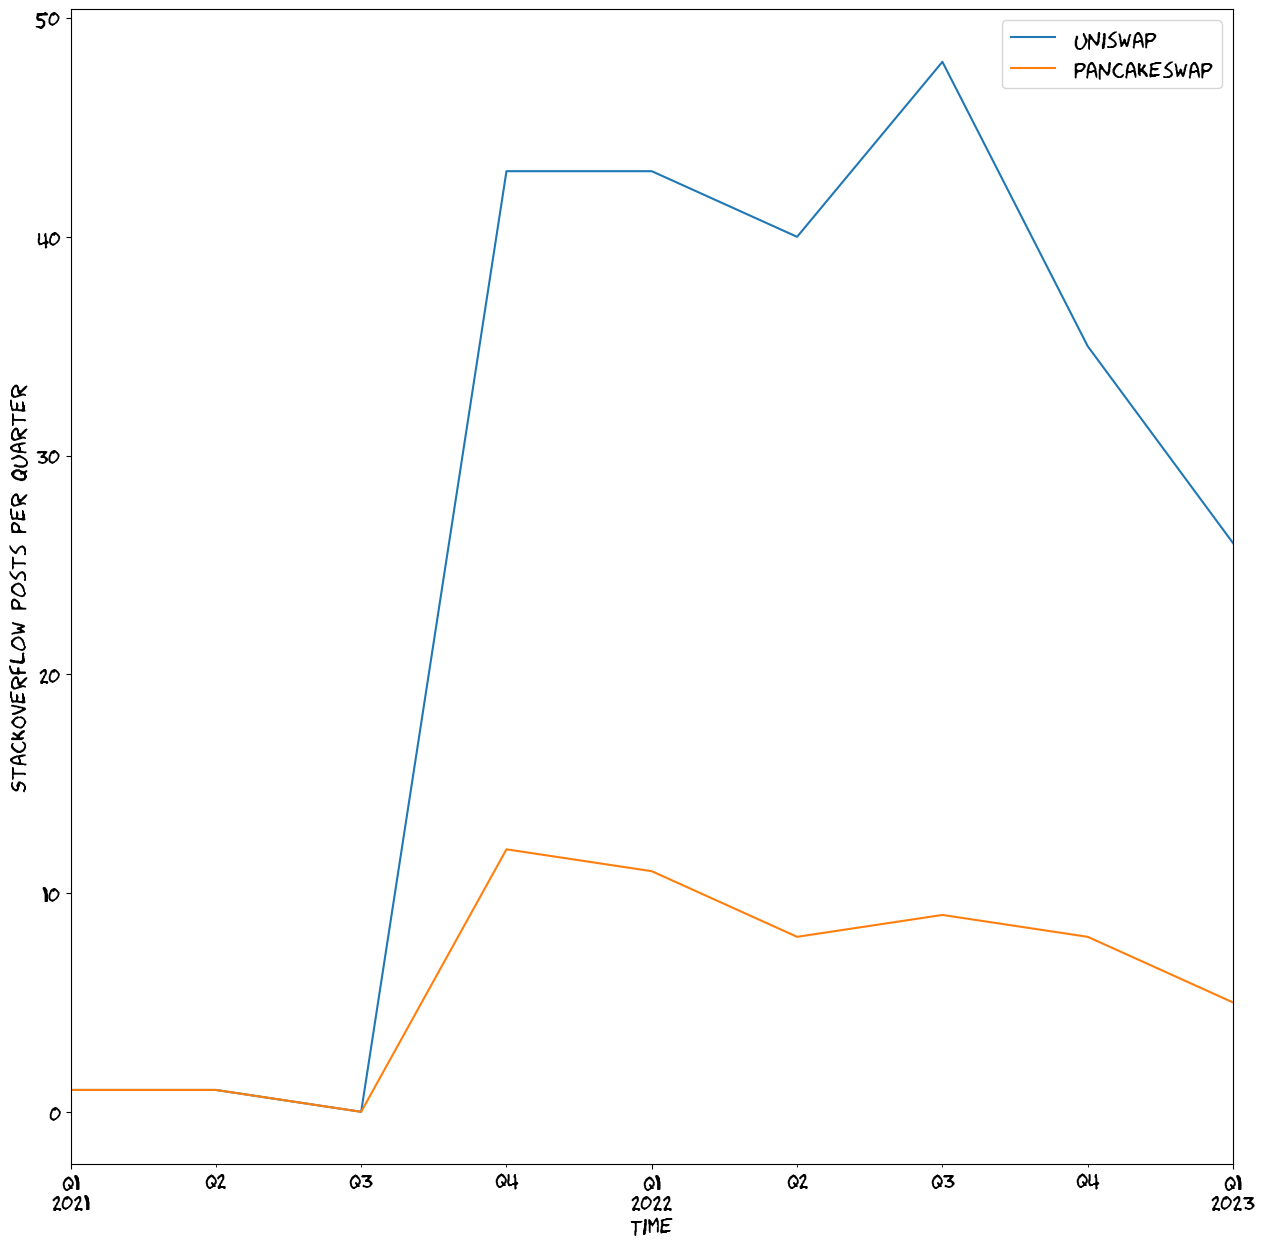

In [12]:
quaterly_binned = create_binned_df_by_tags(
    df, 
    {
        "uniswap": ("uniswap",),
        "pancakeswap": ("pancakeswap",),
    }, 
)

ax = quaterly_binned.plot.line()

ax.set_xlabel("Time")
ax.set_ylabel("StackOverflow posts per quarter")

# Fungible vs. non-fungible tokens

- How NFTs compare against value tokens

Text(0, 0.5, 'StackOverflow posts per quarter')

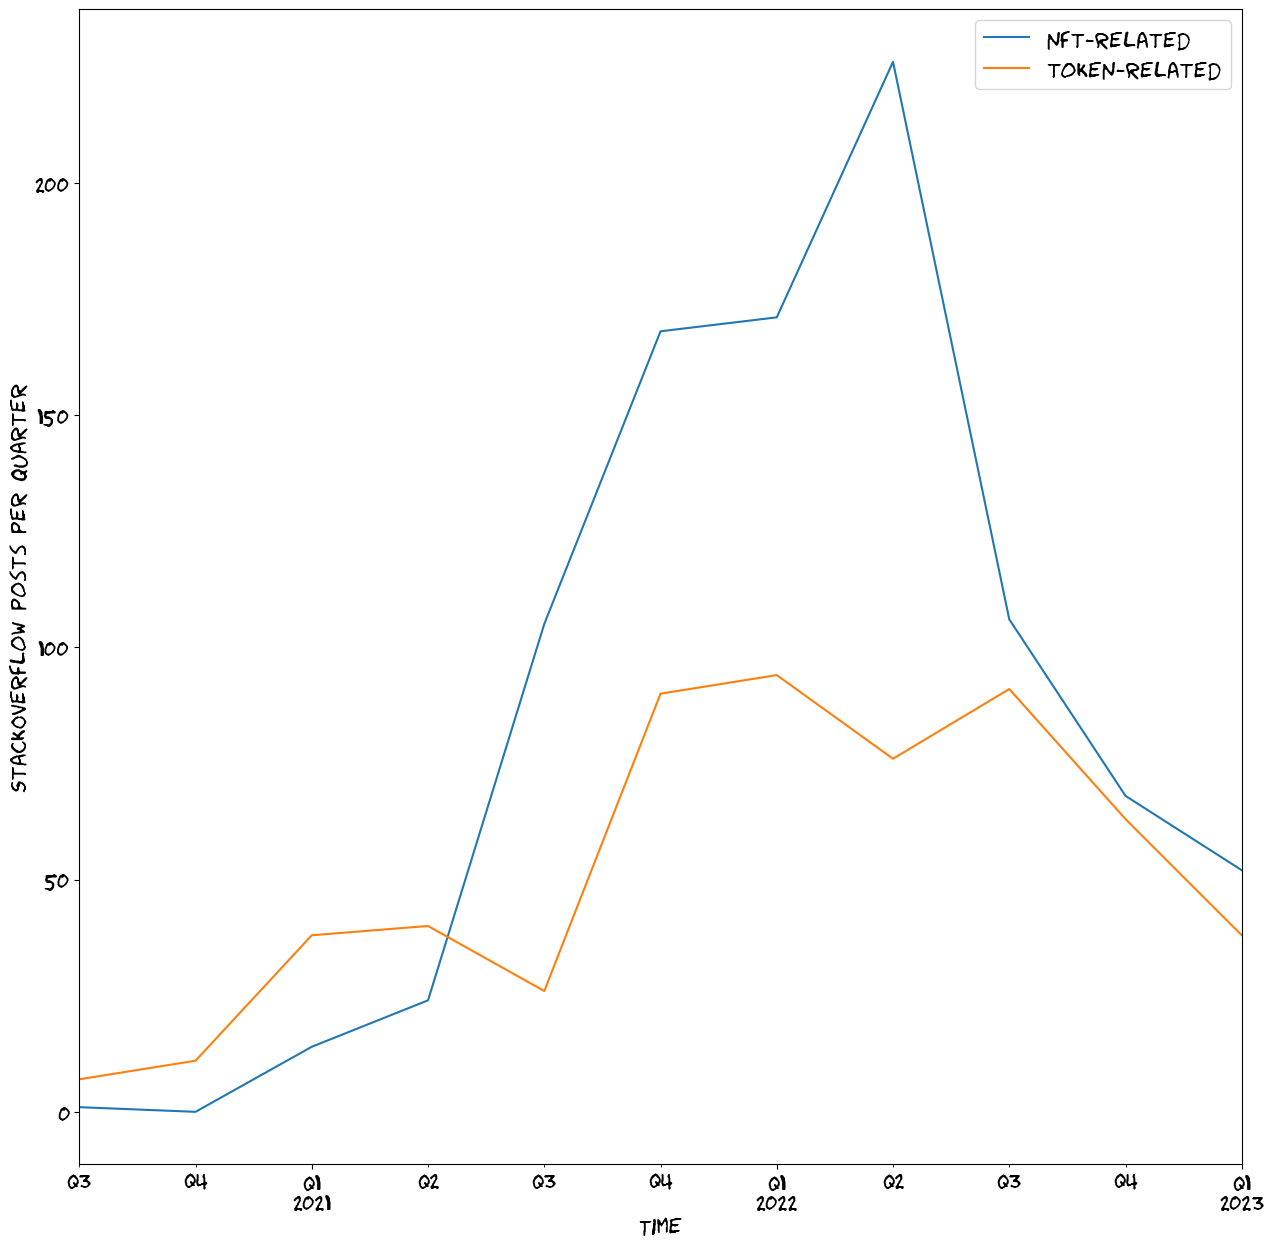

In [13]:
quaterly_binned = create_binned_df_by_tags(
    df, 
    {
        "nft-related": ("nft", "metaplex", "opensea"),
        "token-related": ("erc20", "uniswap"),
    }, 
)

ax = quaterly_binned.plot.line()

ax.set_xlabel("Time")
ax.set_ylabel("StackOverflow posts per quarter")

# Ethereum JavaScript vs. Python

- Compare Ethereum integration libraries for various major programming languages
    - JavaScript
    - Python
    - Java
    - Dart
    - Go
- We see how the top two languages, JavaScript and Python, have integration library related questions


Text(0, 0.5, 'StackOverflow posts per quarter')

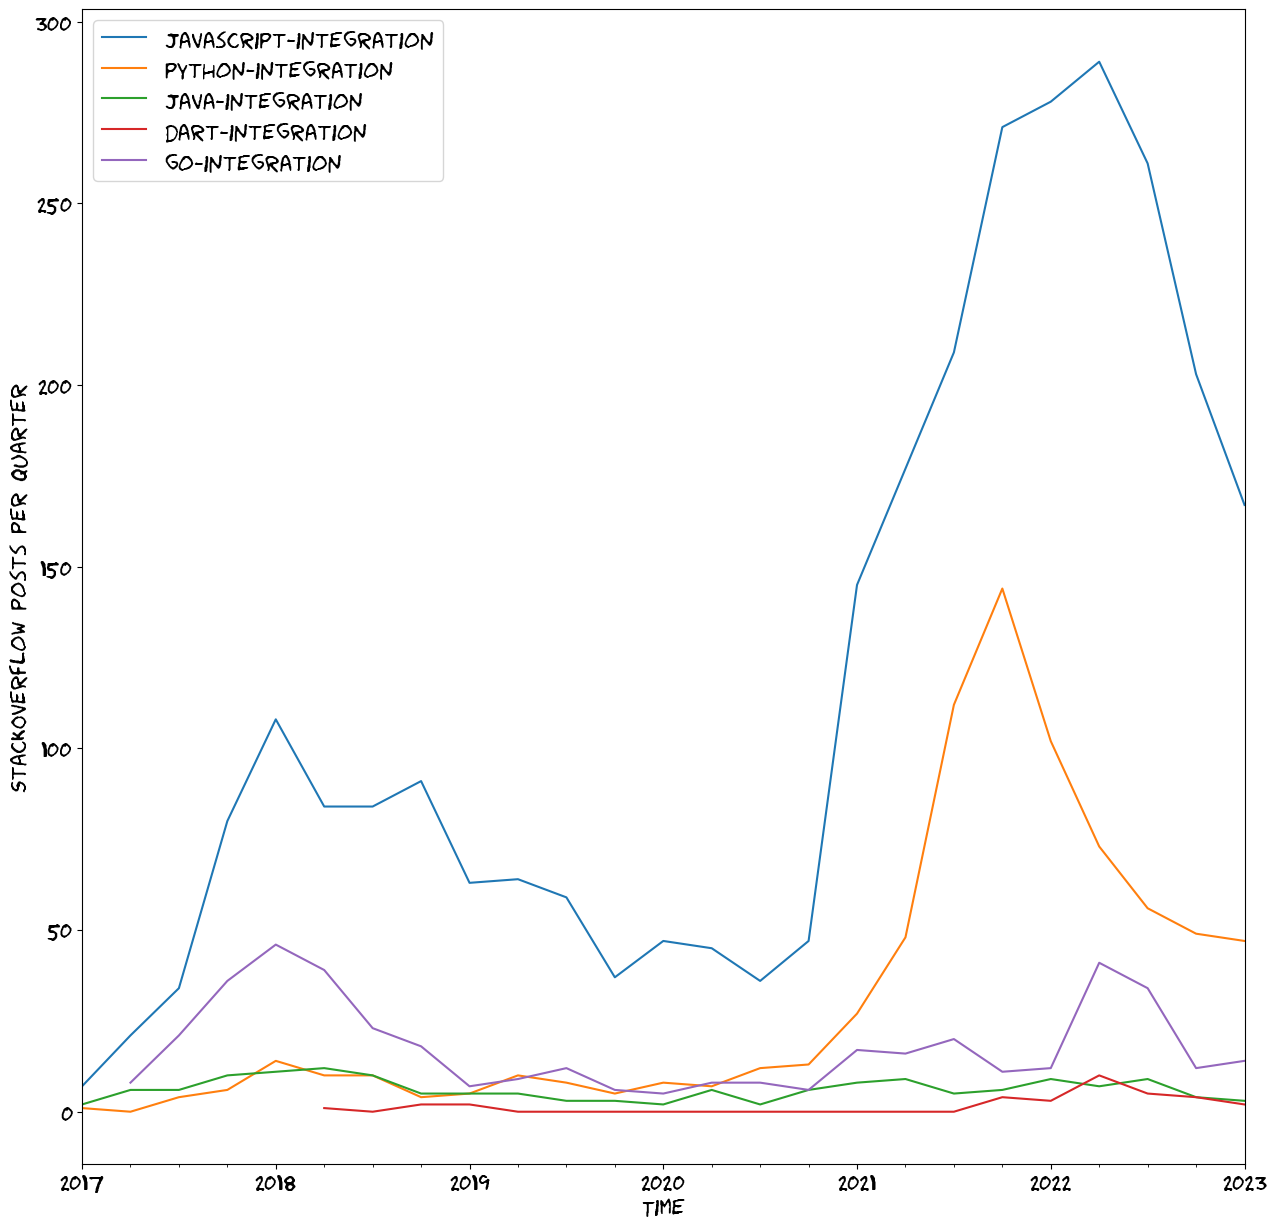

In [14]:
quaterly_binned = create_binned_df_by_tags(
    df, 
    {
        "javascript-integration": ("web3js", "ethers.js"),
        "python-integration": ("web3py", "brownie"),
        "java-integration": ("web3-java",),
        "dart-integration": ("web3dart",),
        "go-integration": ("go-ethereum",),
    }, 
)

ax = quaterly_binned.plot.line()

ax.set_xlabel("Time")
ax.set_ylabel("StackOverflow posts per quarter")

# New smart contract programming languages

- How new smart contract programming languages are coming along
- We do not benchmark against Solidity as it would skew the axes
- With the launch of Aptos and Sui chains, originally developed
  for Facebook's Diem blockchain, Move is gaining in popularity this year
- AssemblyScript is used outside smart contracts, but it saw
  a blink of a popularity on Near blockchain



Text(0, 0.5, 'StackOverflow posts per quarter')

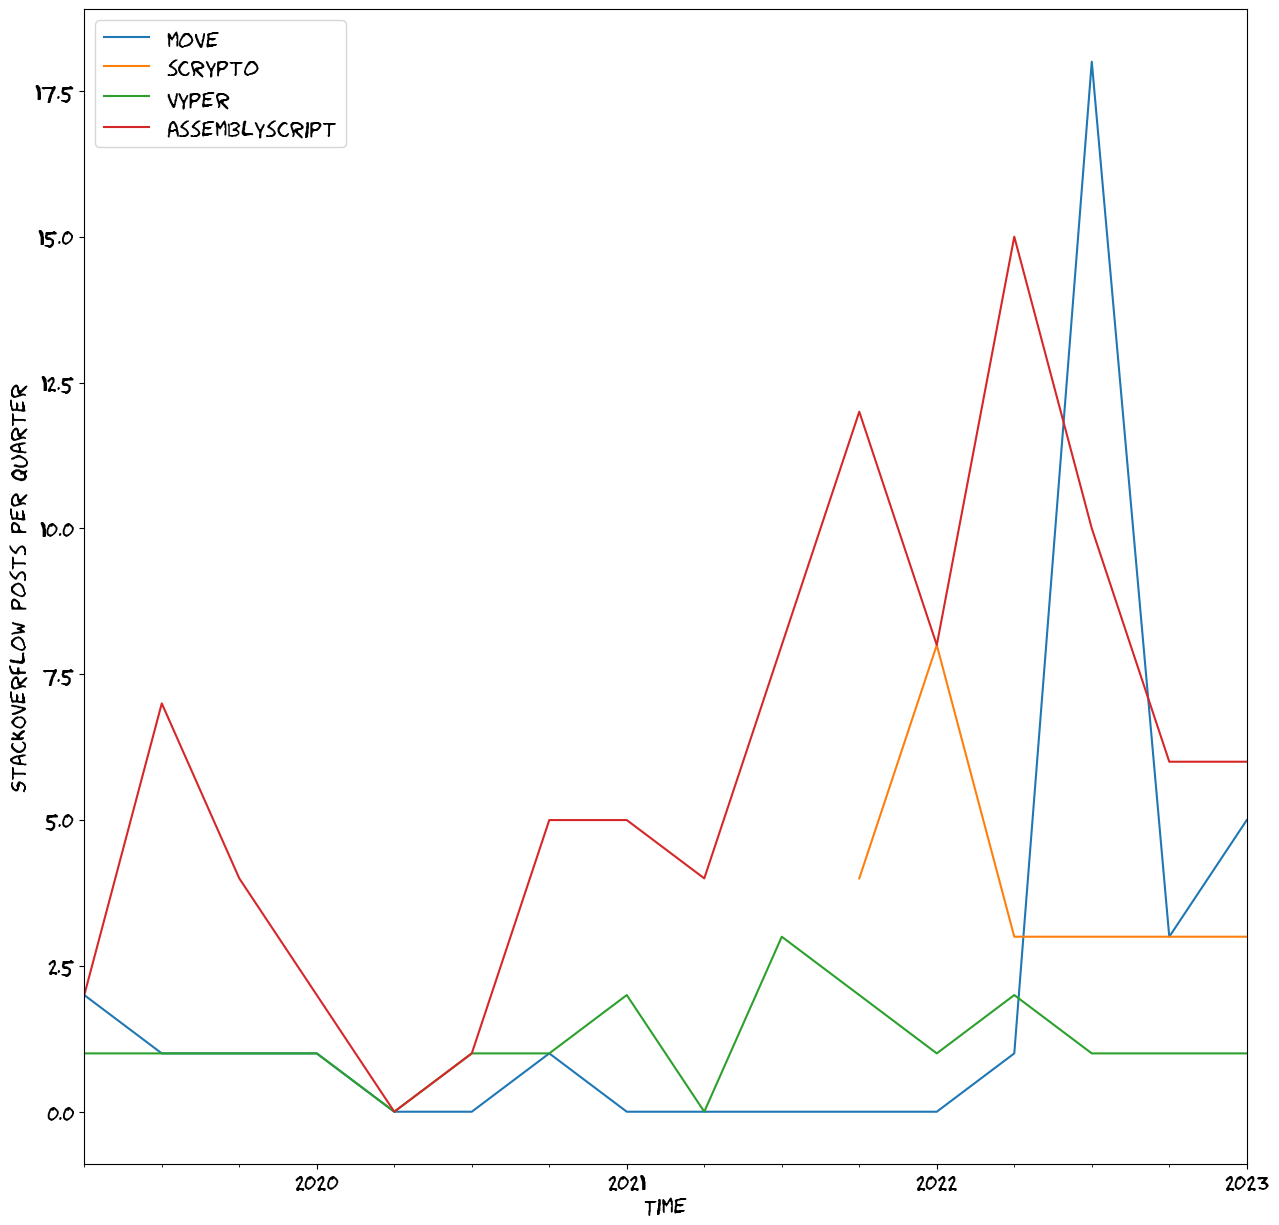

In [15]:
quaterly_binned = create_binned_df_by_tags(
    df, 
    {
        "move": ("move-lang",),
        "scrypto": ("scrypto",),
        "vyper": ("vyper",),
        "assemblyscript": ("assemblyscript",)
    }, 
)

ax = quaterly_binned.plot.line()

ax.set_xlabel("Time")
ax.set_ylabel("StackOverflow posts per quarter")

# Smart contract framework showdown

- Compare popularity of different smart contract development frameworks
- Foundry is taking over from Truffle and Hardhat
- Foundry is too new to be included here
- Foundry support is mostly kindling support on the community Telegram chat
- Brownie is now unmaintained and being replaced by Ape 
- Remix is included here, even though it's web IDE and not a framework per se

Text(0, 0.5, 'StackOverflow posts per quarter')

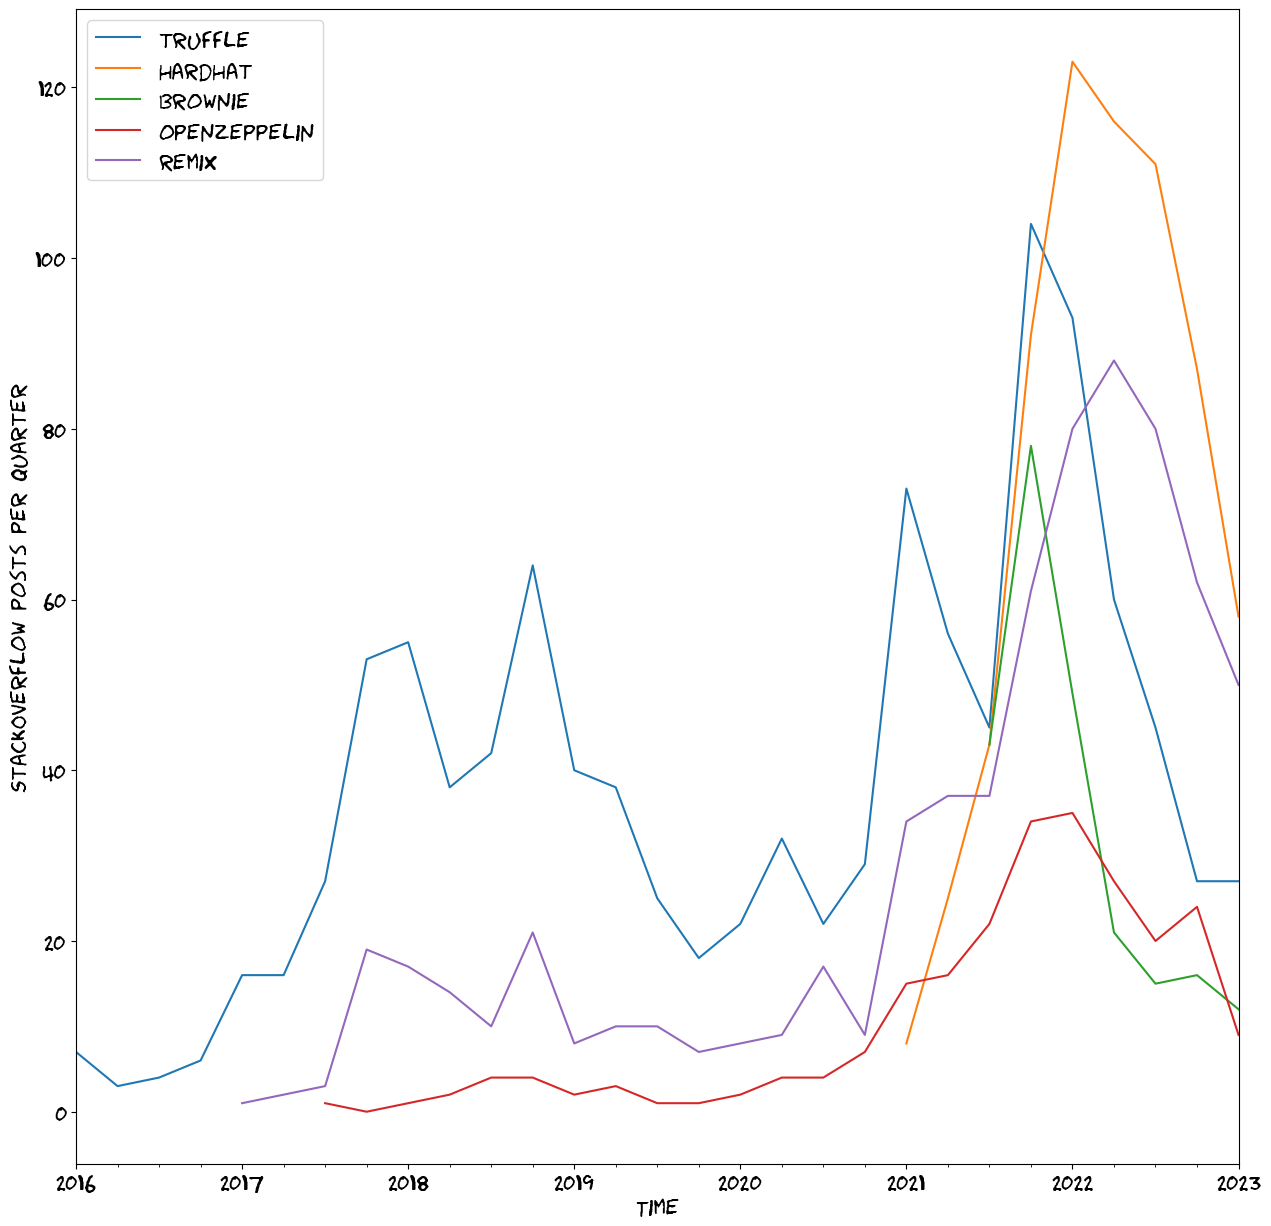

In [16]:
quaterly_binned = create_binned_df_by_tags(
    df, 
    {
        "truffle": ("truffle",),
        "hardhat": ("hardhat",),
        "brownie": ("brownie",),
        "openzeppelin": ("openzeppelin",),
        "remix": ("remix",),
    }, 
)

ax = quaterly_binned.plot.line()

ax.set_xlabel("Time")
ax.set_ylabel("StackOverflow posts per quarter")

# Solana breakdown

- What are the various Solana sub-tags doing



Text(0, 0.5, 'StackOverflow posts per quarter')

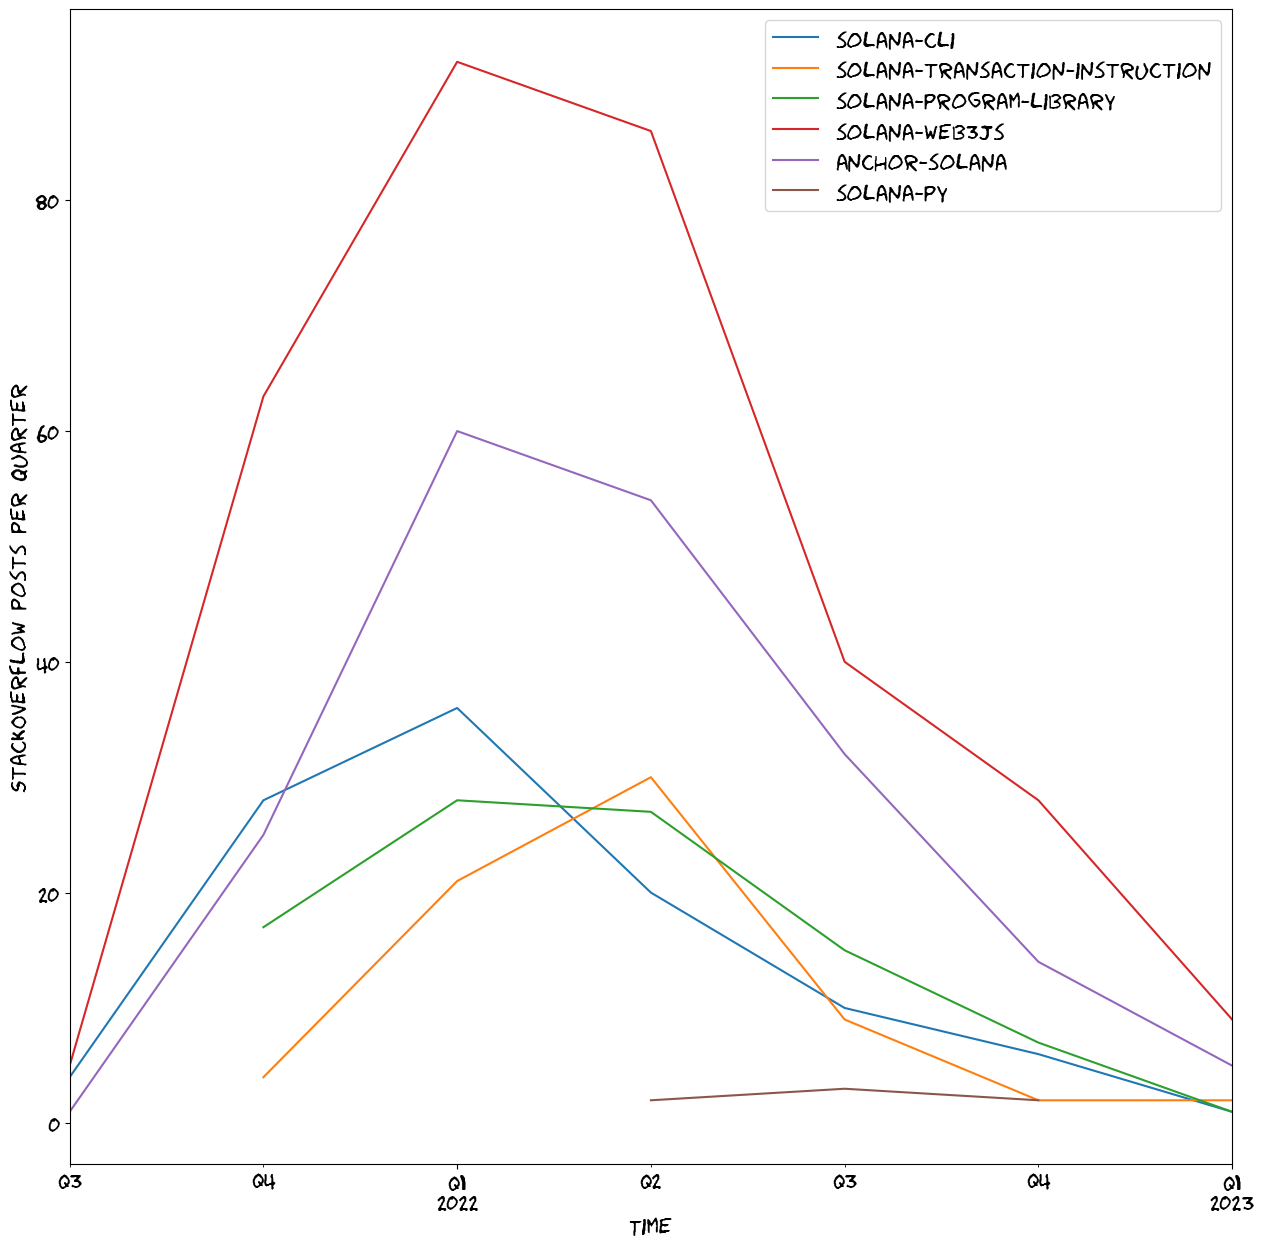

In [17]:
sol_sub_tags = [
    "solana-cli",
    "solana-transaction-instruction",
    "solana-program-library",
    "solana-web3js",
    "anchor-solana",
    "solana-py",    
]

quaterly_binned = create_binned_df_by_tags(
    df, 
    {tag: (tag,) for tag in sol_sub_tags}, 
)

ax = quaterly_binned.plot.line()

ax.set_xlabel("Time")
ax.set_ylabel("StackOverflow posts per quarter")

# Binance breakdown

- What's going on Binance Smart Chain



Text(0, 0.5, 'StackOverflow posts per quarter')

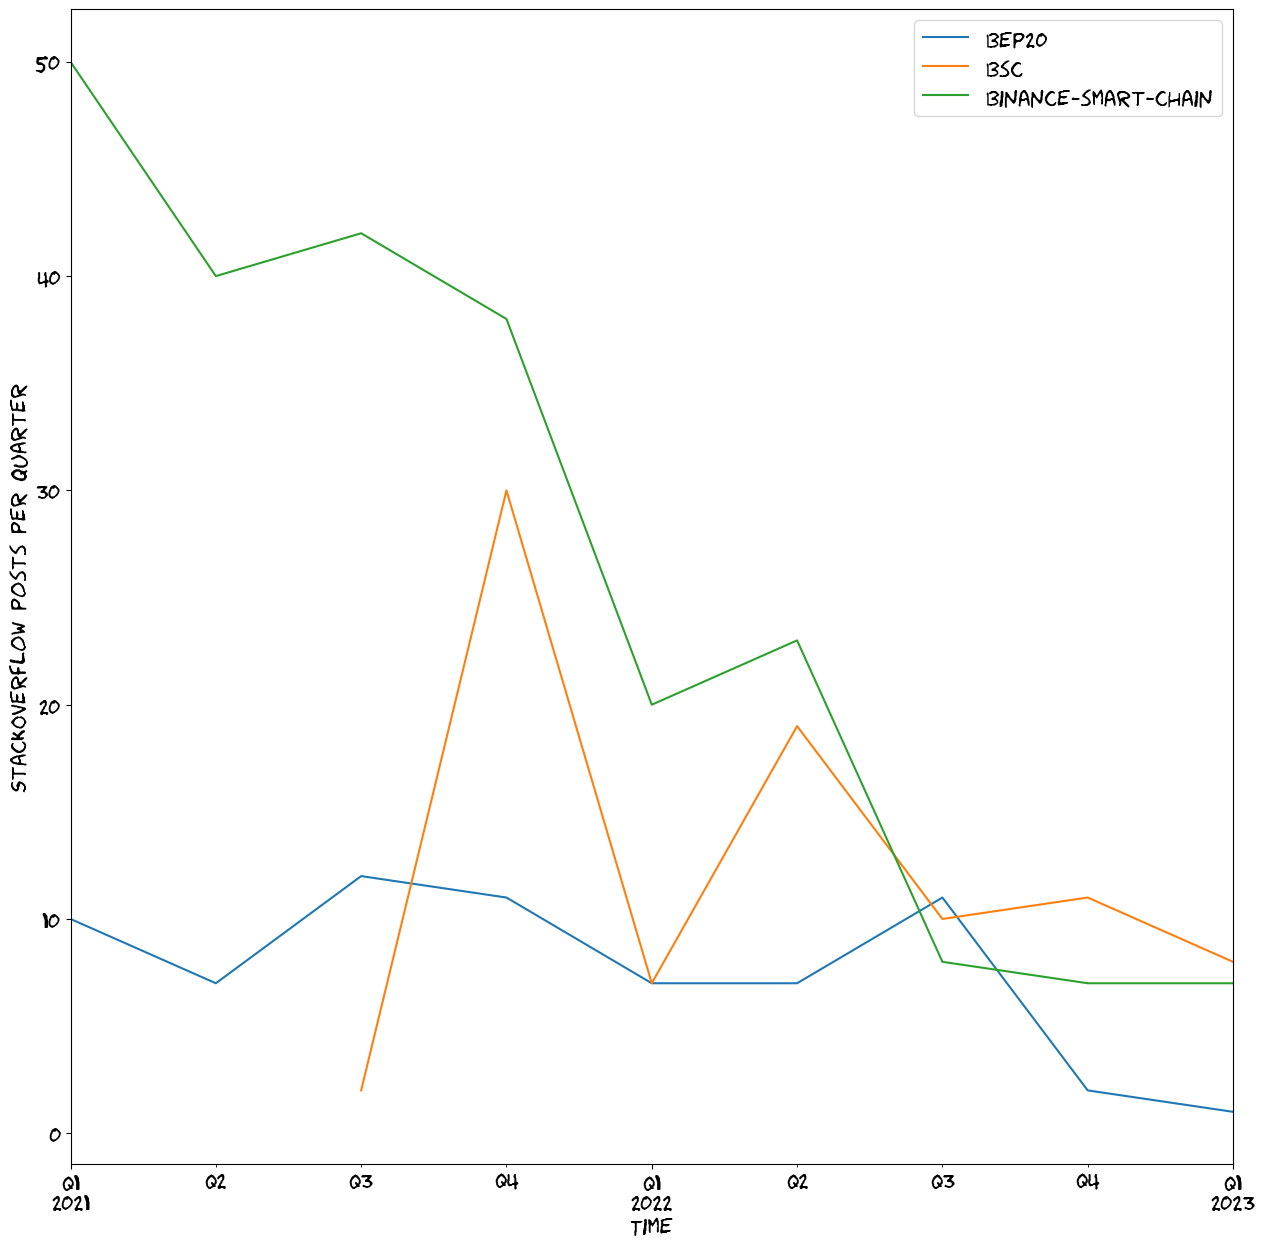

In [18]:
bsc_sub_tags = [
    "bep20",
    "bsc",
    "binance-smart-chain",
]

quaterly_binned = create_binned_df_by_tags(
    df, 
    {tag: (tag,) for tag in bsc_sub_tags}, 
)

ax = quaterly_binned.plot.line()

ax.set_xlabel("Time")
ax.set_ylabel("StackOverflow posts per quarter")

# Wallet related

- While MetaMask is not a programming interface, but a single implementation, 
  people tag their questions with it as they do not understand the difference
- New, mobile-friendly, WalletConnect interface has been in progress since 2021  

Text(0, 0.5, 'StackOverflow posts per quarter')

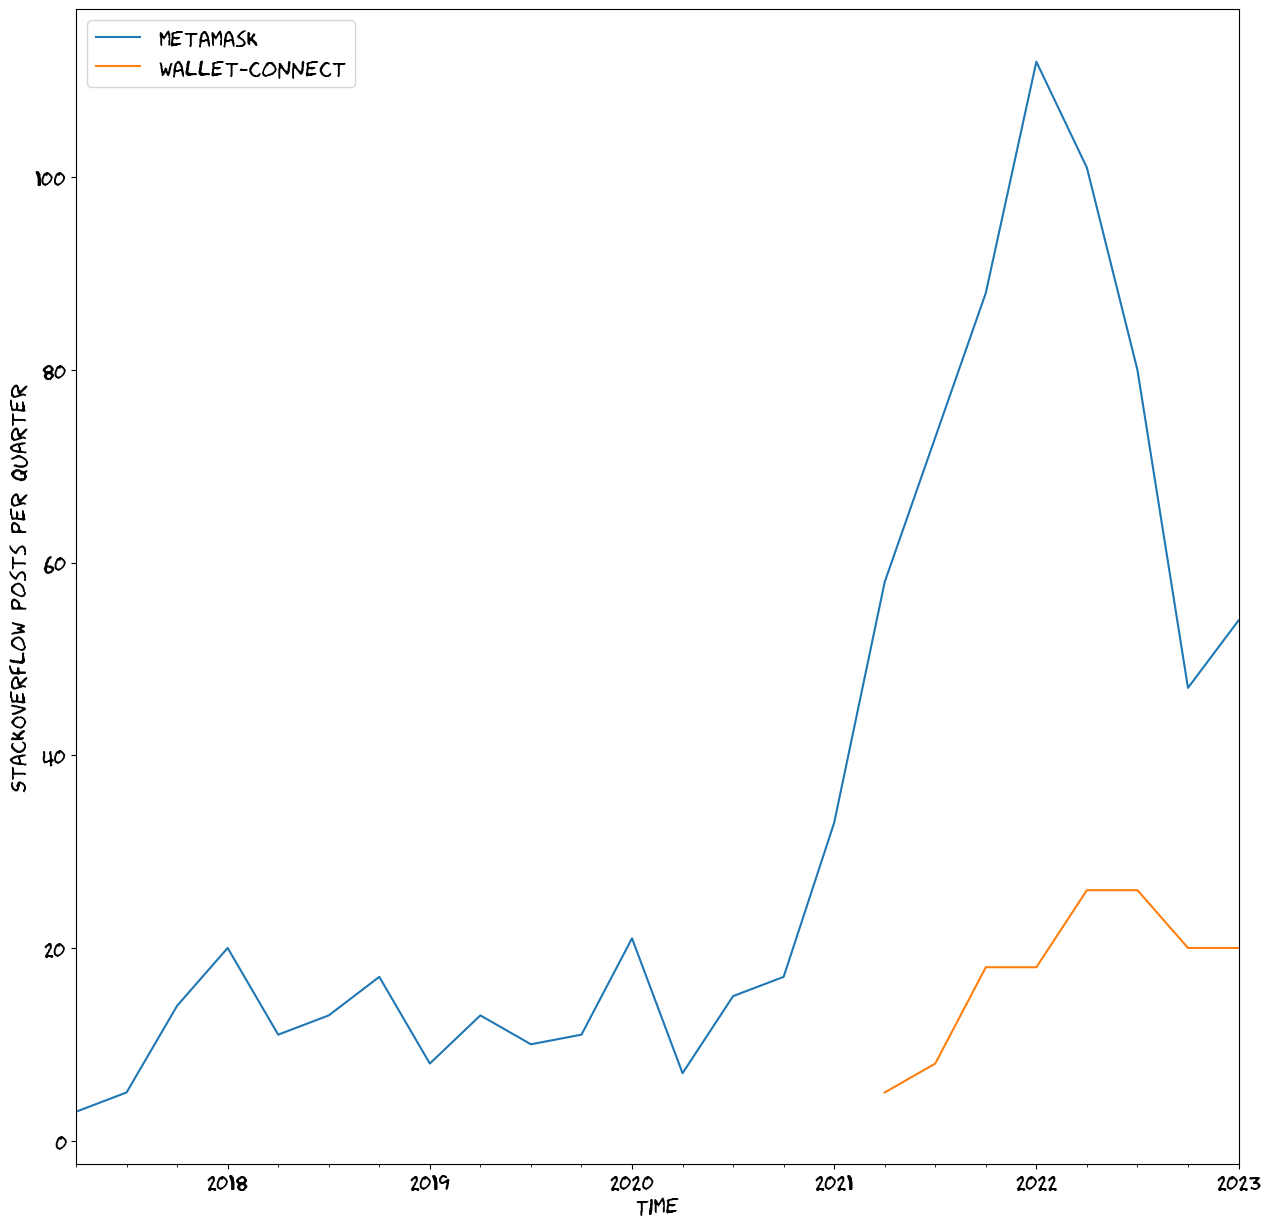

In [19]:
quaterly_binned = create_binned_df_by_tags(
    df, 
    {
        "metamask": ("metamask",),
        "wallet-connect": ("wallet-connect",),
    }, 
)

ax = quaterly_binned.plot.line()

ax.set_xlabel("Time")
ax.set_ylabel("StackOverflow posts per quarter")

# Dapp related

- Benchmark some popular Dapps and protocols that are not blockchains themselves
- OpenSea is included here, although it is not a true decentralised application
  and do not have a developer community


Text(0, 0.5, 'StackOverflow posts per quarter')

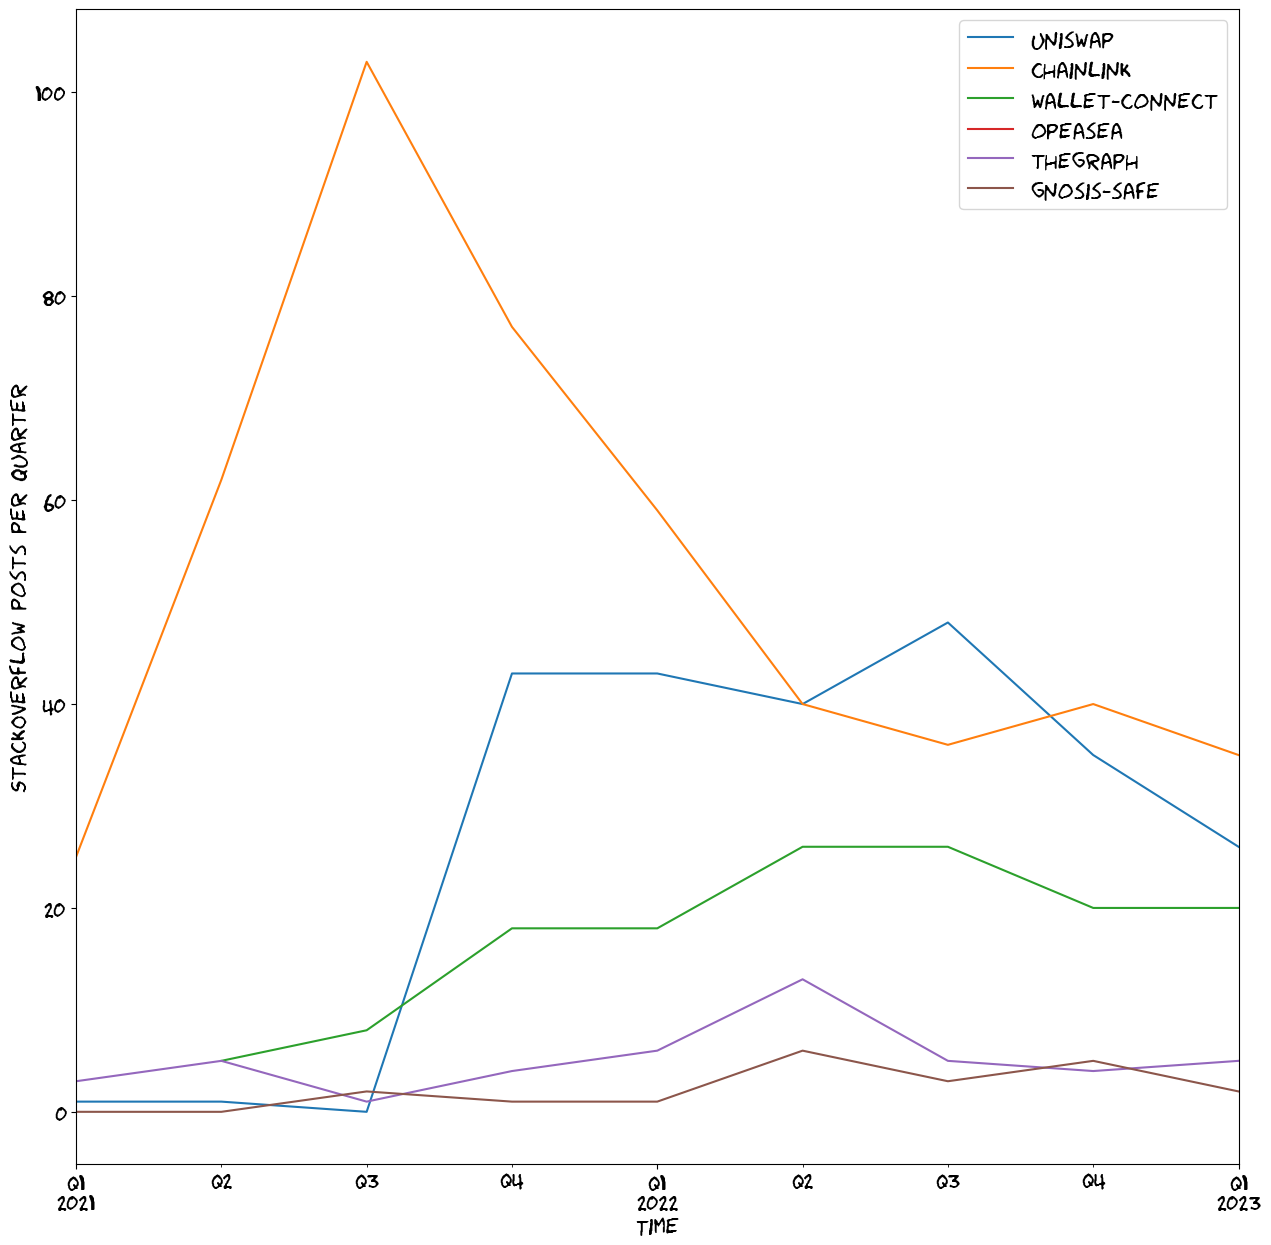

In [20]:
quaterly_binned = create_binned_df_by_tags(
    df, 
    {
        "uniswap": ("uniswap",),
        "chainlink": ("chainlink",),
        "wallet-connect": ("wallet-connect",),
        "opeasea": ("opeasea",),
        "thegraph": ("thegraph",),
        "gnosis-safe": ("gnosis-safe",),
    }, 
)

ax = quaterly_binned.plot.line()

ax.set_xlabel("Time")
ax.set_ylabel("StackOverflow posts per quarter")

# Private or public blockchain

- Hyperledger is the most well-known implementation used on private blockchains
- Private blockchain peaked 2018 and never recovered - enterprises
  are now looking to implement their use cases on public blockchains, subnets or similar

Text(0, 0.5, 'StackOverflow posts per quarter')

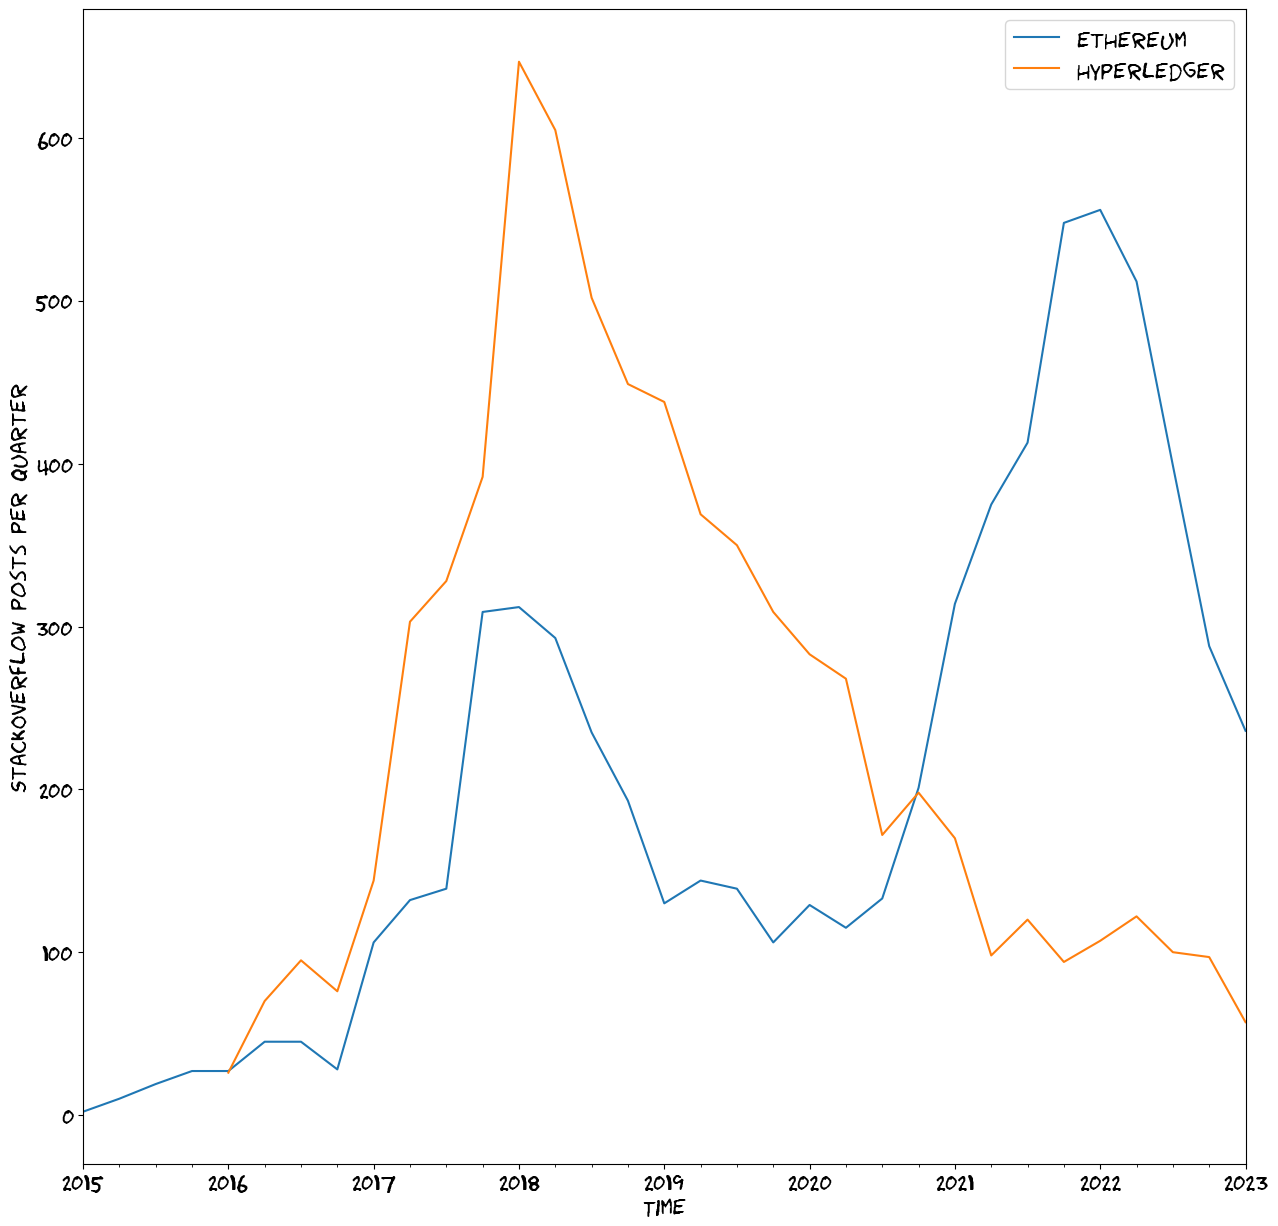

In [21]:
quaterly_binned = create_binned_df_by_tags(
    df, 
    {
        "ethereum": ("ethereum",),
        "hyperledger": ("hyperledger", "hyperledger-fabric",),
    }, 
)

ax = quaterly_binned.plot.line()

ax.set_xlabel("Time")
ax.set_ylabel("StackOverflow posts per quarter")


- We also check how well our enterprise overlords answer to questions compared to the more community oriented public blockchain folks.
- Good answer to posts ratio is a sign of a healthy community
- We see the quality of both Ethereum and Hyperledger communities degrading over time
- This is likely due to more low skilled developers entering the industry,
  whereas early on the community consists on professional developers only


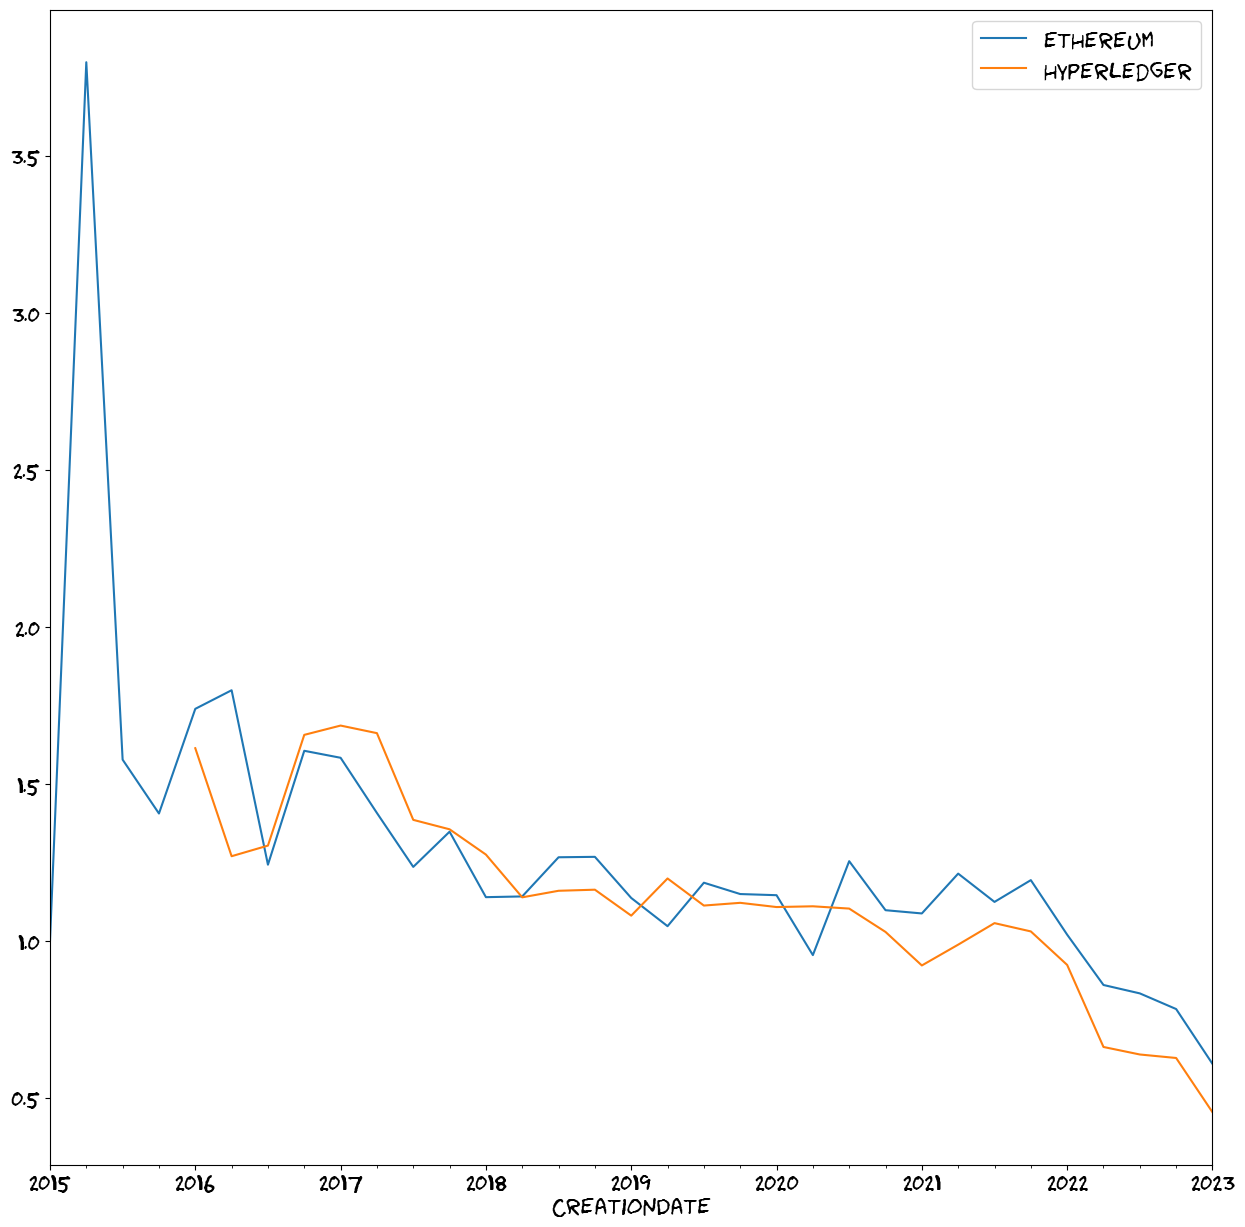

In [22]:
from blockchain_stackoverflow.helpers import bin_to_time_with_answers, get_posts_by_tags

hyperledger = get_posts_by_tags(df, ("hyperledger", "hyperledger-fabric",))
ethereum = get_posts_by_tags(df, ("ethereum",))

hyperledger_binned = bin_to_time_with_answers(hyperledger)
ethereum_binned = bin_to_time_with_answers(ethereum)

answer_ratios = pd.DataFrame({
    "ethereum": ethereum_binned["answer_to_posts_ratio"],
    "hyperledger": hyperledger_binned["answer_to_posts_ratio"],
})

ax = answer_ratios.plot.line()

# Community developer relations health indicator

- We do answer to questions ratio check for every tag we have collected.
- We sort tags by healthiest (most answers to questions) to unheathy (questions go without answers).
- We do not do time analysis for trends, but just take the lifetime value for each tag.
- Some blue chip projects like **Uniswap**, **WalletConnect** and **FileCoin** have very low score, indicating that most questions go unaswered. These projects should likely invest more into the basic documentation and developer support.

web3 lacks any questions


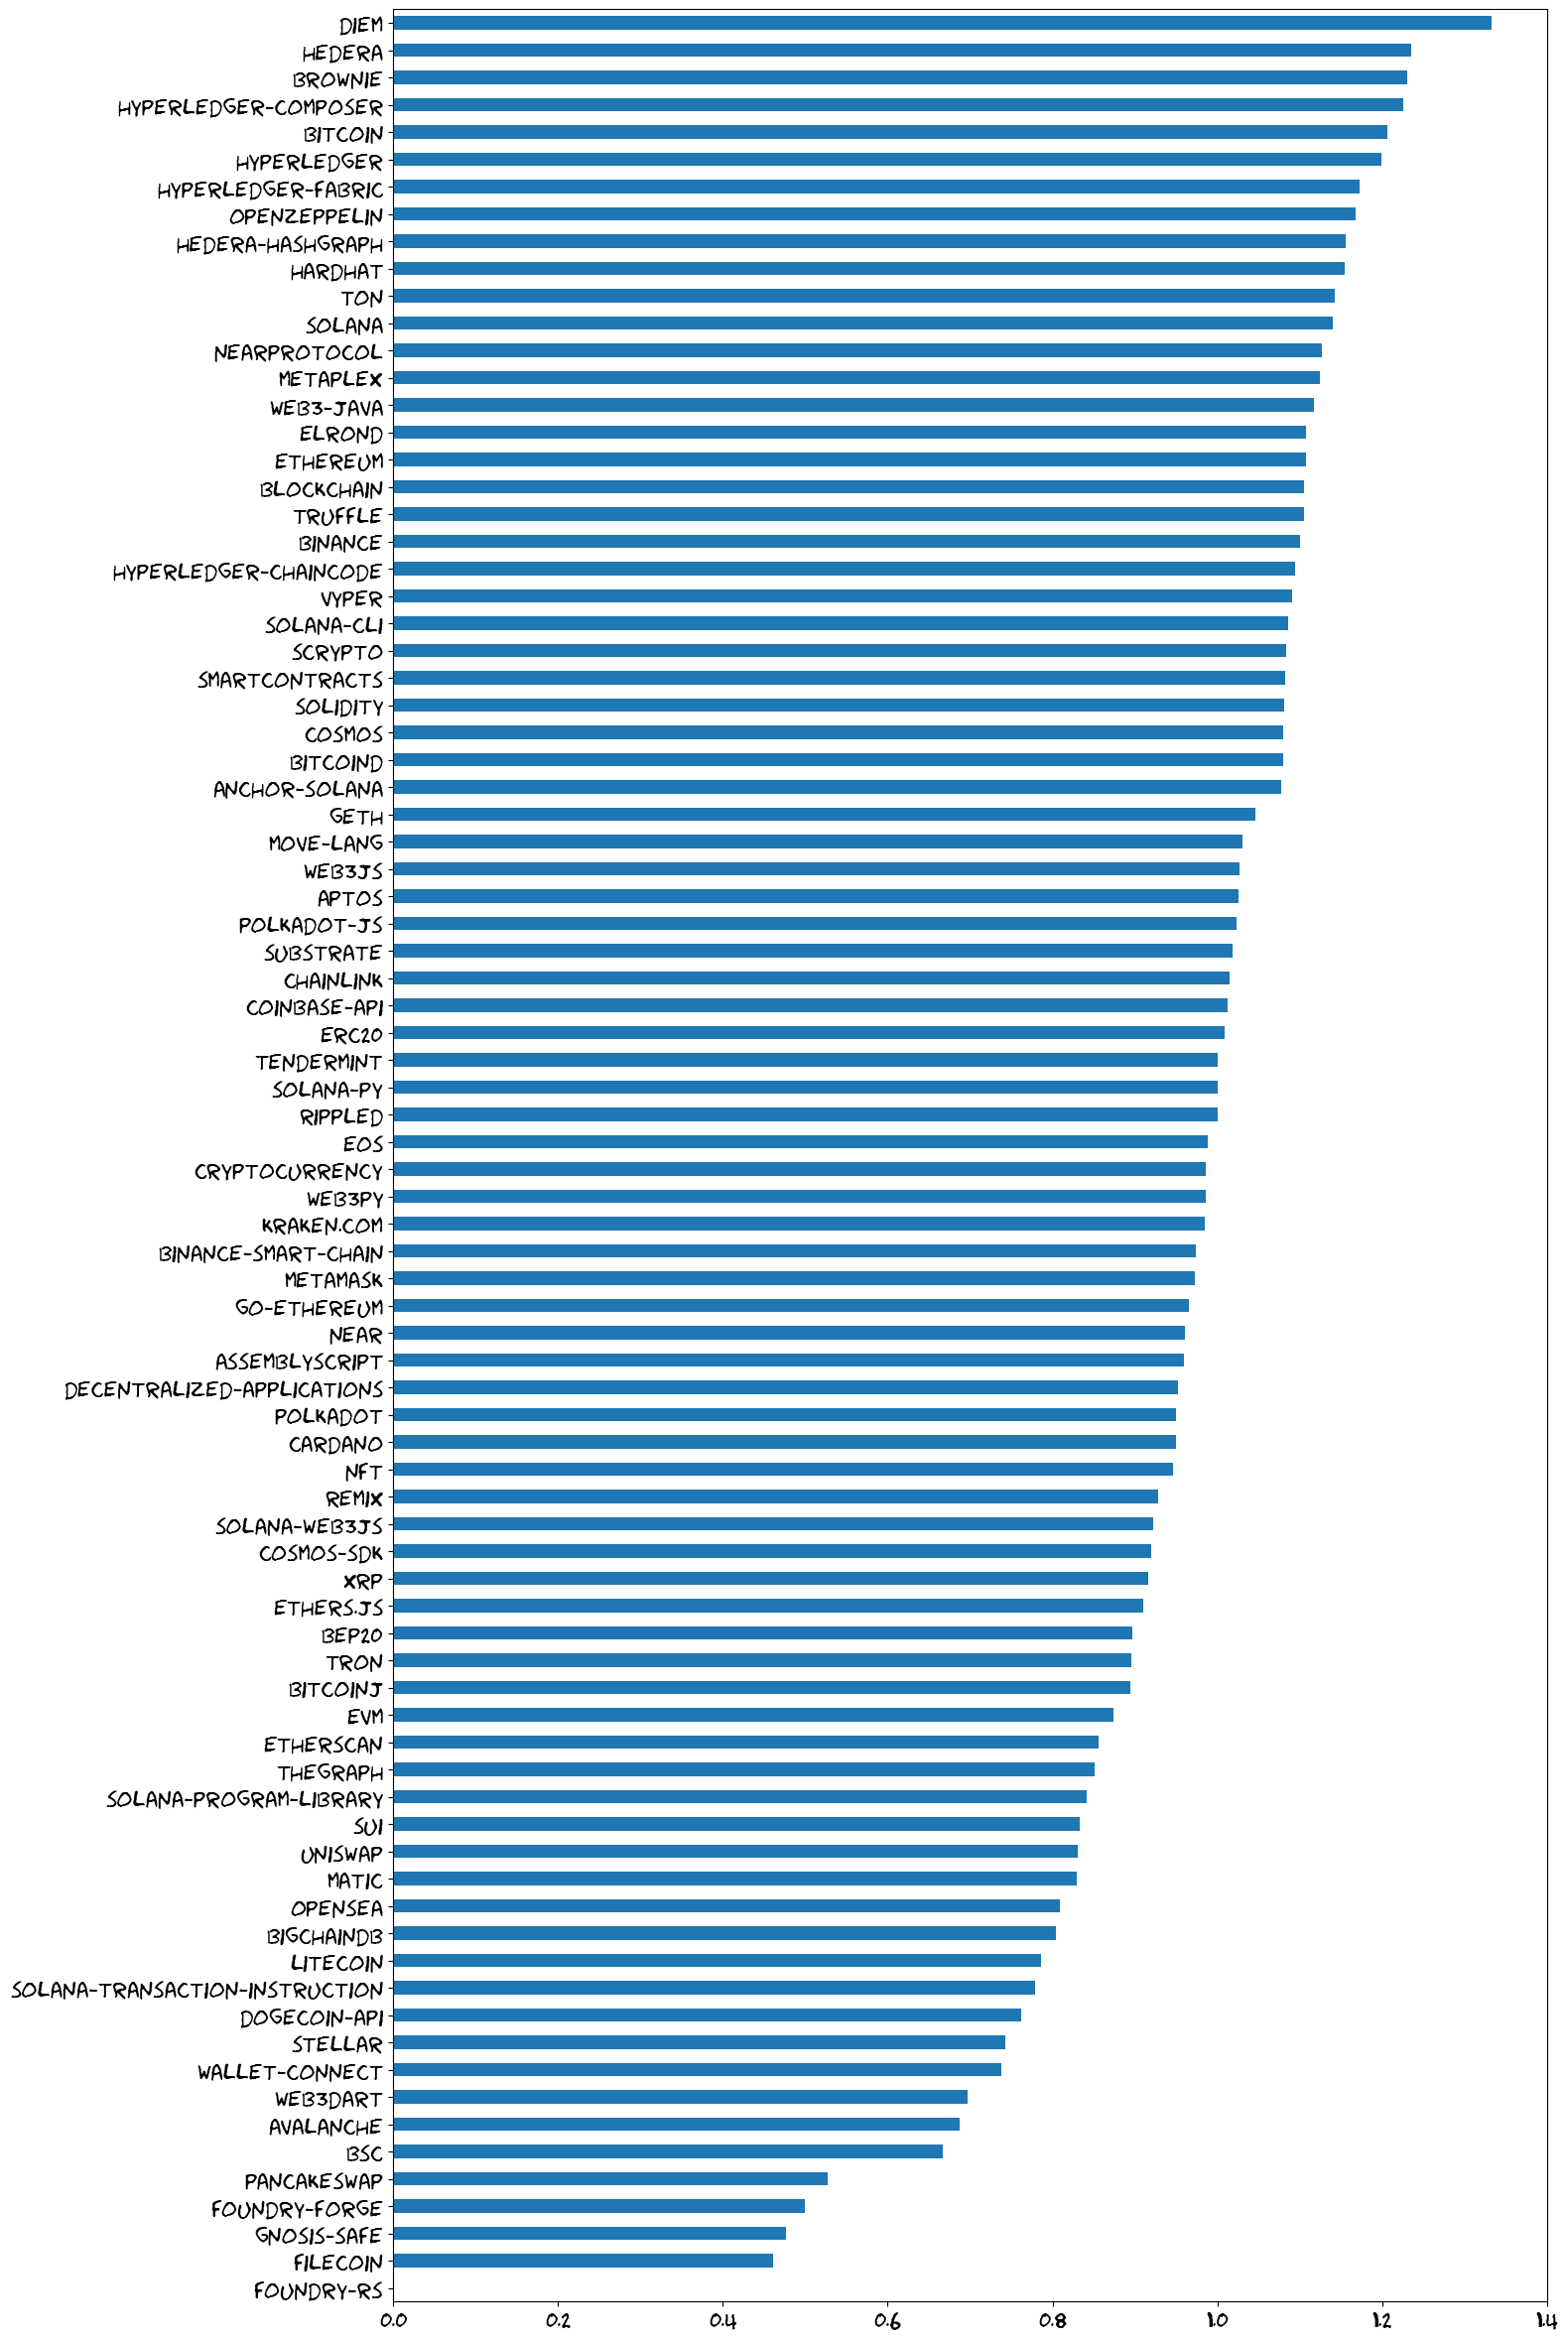

In [30]:

from blockchain_stackoverflow.tag_map import INTERESTING_TAGS

# tag -> answer ratio mappings
ratios = pd.Series(dtype="float")

for tag in INTERESTING_TAGS:
    posts = get_posts_by_tags(df, (tag,))
    question_count = len(posts)
    if question_count == 0:
        print(f"{tag} lacks any questions")
        continue
    answer_count = posts["AnswerCount"].sum()
    ratios[tag] = answer_count / question_count

ratios = ratios.sort_values()
ax = ratios.plot.barh(figsize=(15, 30,))
